In [1]:
import numpy as np
import pandas as np
import os

import fastai
from fastai.vision.all import *


In [2]:
df = pd.read_csv('train_labels.csv')

In [3]:
df['label'].unique()

array([21, 29, 17, 50,  8, 42, 68, 10,  9, 39, 11, 44, 49,  5, 65, 61, 56,
       43, 54, 40, 23, 64, 58, 33, 45,  3, 12, 46, 59, 77, 14, 13, 18, 69,
       47, 63, 52, 66, 80, 30, 55, 53, 19, 67, 78, 24,  2, 25, 37, 57, 36,
        6,  1, 72, 27, 60, 31, 48, 74, 51, 15, 26, 75, 62,  4, 22, 41, 79,
       34, 73,  7, 71, 35, 38, 76, 28, 70, 16, 32, 20])

In [4]:
df['label'].value_counts()

71    525
37    494
57    491
61    490
9     489
     ... 
59    278
78    274
67    257
42    255
20     27
Name: label, Length: 80, dtype: int64

In [5]:
#df = df[:1000]

In [6]:
dblock = DataBlock()
dsets = dblock.datasets(df)

In [7]:
len(dsets.train),len(dsets.valid)

(24490, 6122)

In [8]:
path= 'train_set/'
def get_x(r): return path + r['img_name']
def get_y(r): return str(r['label'])
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('train_set/train_28442.jpg', '25')

In [9]:
def get_dls(bs, size):
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(460),
                   splitter=RandomSplitter(0.01),
                   batch_tfms=[*aug_transforms(size=size, min_scale=0.75),
                               Normalize.from_stats(*imagenet_stats)])
    return dblock.dataloaders(df, bs=bs)

In [10]:
dls = get_dls(48, 256)

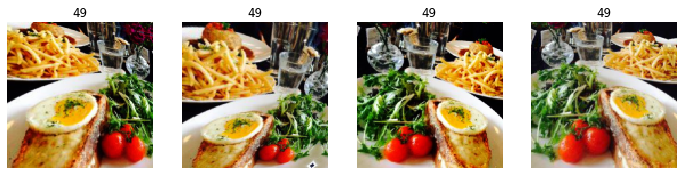

In [12]:
#dls.show_batch(max_n=4, nrows=1, unique=True)

In [16]:
model = xresnet101(n_out=dls.c)
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), 
                metrics=accuracy)
#Adding tensorboad callback 
#tboard_path = Path('tensorboard/' + 'food_recognition')
#learn.add_cbs(TensorBoardCallback('tensorboard/run_2', trace_model=True))
#learn.fit_one_cycle(4, 3e-3, cbs = SaveModelCallback(monitor='accuracy', comp=np.greater, fname='best_run2'))


In [17]:
l = learn.load('best_run5_medium')
test_path = 'test_set/'
l.predict(test_path+'test_1.jpg')[0]

'48'

In [18]:
import csv

f = open('sample.csv')
samples = csv.reader(f)
lines = list(samples)

for row in lines[1:]:
    prediction = l.predict(test_path+row[0])
    print(row[0])
    row[1] = int(prediction[0])
    
writer = csv.writer(open('sample_6.csv', 'w'))
writer.writerows(lines)


test_1.jpg


test_2.jpg


test_3.jpg


test_4.jpg


test_5.jpg


test_6.jpg


test_7.jpg


test_8.jpg


test_9.jpg


test_10.jpg


test_11.jpg


test_12.jpg


test_13.jpg


test_14.jpg


test_15.jpg


test_16.jpg


test_17.jpg


test_18.jpg


test_19.jpg


test_20.jpg


test_21.jpg


test_22.jpg


test_23.jpg


test_24.jpg


test_25.jpg


test_26.jpg


test_27.jpg


test_28.jpg


test_29.jpg


test_30.jpg


test_31.jpg


test_32.jpg


test_33.jpg


test_34.jpg


test_35.jpg


test_36.jpg


test_37.jpg


test_38.jpg


test_39.jpg


test_40.jpg


test_41.jpg


test_42.jpg


test_43.jpg


test_44.jpg


test_45.jpg


test_46.jpg


test_47.jpg


test_48.jpg


test_49.jpg


test_50.jpg


test_51.jpg


test_52.jpg


test_53.jpg


test_54.jpg


test_55.jpg


test_56.jpg


test_57.jpg


test_58.jpg


test_59.jpg


test_60.jpg


test_61.jpg


test_62.jpg


test_63.jpg


test_64.jpg


test_65.jpg


test_66.jpg


test_67.jpg


test_68.jpg


test_69.jpg


test_70.jpg


test_71.jpg


test_72.jpg


test_73.jpg


test_74.jpg


test_75.jpg


test_76.jpg


test_77.jpg


test_78.jpg


test_79.jpg


test_80.jpg


test_81.jpg


test_82.jpg


test_83.jpg


test_84.jpg


test_85.jpg


test_86.jpg


test_87.jpg


test_88.jpg


test_89.jpg


test_90.jpg


test_91.jpg


test_92.jpg


test_93.jpg


test_94.jpg


test_95.jpg


test_96.jpg


test_97.jpg


test_98.jpg


test_99.jpg


test_100.jpg


test_101.jpg


test_102.jpg


test_103.jpg


test_104.jpg


test_105.jpg


test_106.jpg


test_107.jpg


test_108.jpg


test_109.jpg


test_110.jpg


test_111.jpg


test_112.jpg


test_113.jpg


test_114.jpg


test_115.jpg


test_116.jpg


test_117.jpg


test_118.jpg


test_119.jpg


test_120.jpg


test_121.jpg


test_122.jpg


test_123.jpg


test_124.jpg


test_125.jpg


test_126.jpg


test_127.jpg


test_128.jpg


test_129.jpg


test_130.jpg


test_131.jpg


test_132.jpg


test_133.jpg


test_134.jpg


test_135.jpg


test_136.jpg


test_137.jpg


test_138.jpg


test_139.jpg


test_140.jpg


test_141.jpg


test_142.jpg


test_143.jpg


test_144.jpg


test_145.jpg


test_146.jpg


test_147.jpg


test_148.jpg


test_149.jpg


test_150.jpg


test_151.jpg


test_152.jpg


test_153.jpg


test_154.jpg


test_155.jpg


test_156.jpg


test_157.jpg


test_158.jpg


test_159.jpg


test_160.jpg


test_161.jpg


test_162.jpg


test_163.jpg


test_164.jpg


test_165.jpg


test_166.jpg


test_167.jpg


test_168.jpg


test_169.jpg


test_170.jpg


test_171.jpg


test_172.jpg


test_173.jpg


test_174.jpg


test_175.jpg


test_176.jpg


test_177.jpg


test_178.jpg


test_179.jpg


test_180.jpg


test_181.jpg


test_182.jpg


test_183.jpg


test_184.jpg


test_185.jpg


test_186.jpg


test_187.jpg


test_188.jpg


test_189.jpg


test_190.jpg


test_191.jpg


test_192.jpg


test_193.jpg


test_194.jpg


test_195.jpg


test_196.jpg


test_197.jpg


test_198.jpg


test_199.jpg


test_200.jpg


test_201.jpg


test_202.jpg


test_203.jpg


test_204.jpg


test_205.jpg


test_206.jpg


test_207.jpg


test_208.jpg


test_209.jpg


test_210.jpg


test_211.jpg


test_212.jpg


test_213.jpg


test_214.jpg


test_215.jpg


test_216.jpg


test_217.jpg


test_218.jpg


test_219.jpg


test_220.jpg


test_221.jpg


test_222.jpg


test_223.jpg


test_224.jpg


test_225.jpg


test_226.jpg


test_227.jpg


test_228.jpg


test_229.jpg


test_230.jpg


test_231.jpg


test_232.jpg


test_233.jpg


test_234.jpg


test_235.jpg


test_236.jpg


test_237.jpg


test_238.jpg


test_239.jpg


test_240.jpg


test_241.jpg


test_242.jpg


test_243.jpg


test_244.jpg


test_245.jpg


test_246.jpg


test_247.jpg


test_248.jpg


test_249.jpg


test_250.jpg


test_251.jpg


test_252.jpg


test_253.jpg


test_254.jpg


test_255.jpg


test_256.jpg


test_257.jpg


test_258.jpg


test_259.jpg


test_260.jpg


test_261.jpg


test_262.jpg


test_263.jpg


test_264.jpg


test_265.jpg


test_266.jpg


test_267.jpg


test_268.jpg


test_269.jpg


test_270.jpg


test_271.jpg


test_272.jpg


test_273.jpg


test_274.jpg


test_275.jpg


test_276.jpg


test_277.jpg


test_278.jpg


test_279.jpg


test_280.jpg


test_281.jpg


test_282.jpg


test_283.jpg


test_284.jpg


test_285.jpg


test_286.jpg


test_287.jpg


test_288.jpg


test_289.jpg


test_290.jpg


test_291.jpg


test_292.jpg


test_293.jpg


test_294.jpg


test_295.jpg


test_296.jpg


test_297.jpg


test_298.jpg


test_299.jpg


test_300.jpg


test_301.jpg


test_302.jpg


test_303.jpg


test_304.jpg


test_305.jpg


test_306.jpg


test_307.jpg


test_308.jpg


test_309.jpg


test_310.jpg


test_311.jpg


test_312.jpg


test_313.jpg


test_314.jpg


test_315.jpg


test_316.jpg


test_317.jpg


test_318.jpg


test_319.jpg


test_320.jpg


test_321.jpg


test_322.jpg


test_323.jpg


test_324.jpg


test_325.jpg


test_326.jpg


test_327.jpg


test_328.jpg


test_329.jpg


test_330.jpg


test_331.jpg


test_332.jpg


test_333.jpg


test_334.jpg


test_335.jpg


test_336.jpg


test_337.jpg


test_338.jpg


test_339.jpg


test_340.jpg


test_341.jpg


test_342.jpg


test_343.jpg


test_344.jpg


test_345.jpg


test_346.jpg


test_347.jpg


test_348.jpg


test_349.jpg


test_350.jpg


test_351.jpg


test_352.jpg


test_353.jpg


test_354.jpg


test_355.jpg


test_356.jpg


test_357.jpg


test_358.jpg


test_359.jpg


test_360.jpg


test_361.jpg


test_362.jpg


test_363.jpg


test_364.jpg


test_365.jpg


test_366.jpg


test_367.jpg


test_368.jpg


test_369.jpg


test_370.jpg


test_371.jpg


test_372.jpg


test_373.jpg


test_374.jpg


test_375.jpg


test_376.jpg


test_377.jpg


test_378.jpg


test_379.jpg


test_380.jpg


test_381.jpg


test_382.jpg


test_383.jpg


test_384.jpg


test_385.jpg


test_386.jpg


test_387.jpg


test_388.jpg


test_389.jpg


test_390.jpg


test_391.jpg


test_392.jpg


test_393.jpg


test_394.jpg


test_395.jpg


test_396.jpg


test_397.jpg


test_398.jpg


test_399.jpg


test_400.jpg


test_401.jpg


test_402.jpg


test_403.jpg


test_404.jpg


test_405.jpg


test_406.jpg


test_407.jpg


test_408.jpg


test_409.jpg


test_410.jpg


test_411.jpg


test_412.jpg


test_413.jpg


test_414.jpg


test_415.jpg


test_416.jpg


test_417.jpg


test_418.jpg


test_419.jpg


test_420.jpg


test_421.jpg


test_422.jpg


test_423.jpg


test_424.jpg


test_425.jpg


test_426.jpg


test_427.jpg


test_428.jpg


test_429.jpg


test_430.jpg


test_431.jpg


test_432.jpg


test_433.jpg


test_434.jpg


test_435.jpg


test_436.jpg


test_437.jpg


test_438.jpg


test_439.jpg


test_440.jpg


test_441.jpg


test_442.jpg


test_443.jpg


test_444.jpg


test_445.jpg


test_446.jpg


test_447.jpg


test_448.jpg


test_449.jpg


test_450.jpg


test_451.jpg


test_452.jpg


test_453.jpg


test_454.jpg


test_455.jpg


test_456.jpg


test_457.jpg


test_458.jpg


test_459.jpg


test_460.jpg


test_461.jpg


test_462.jpg


test_463.jpg


test_464.jpg


test_465.jpg


test_466.jpg


test_467.jpg


test_468.jpg


test_469.jpg


test_470.jpg


test_471.jpg


test_472.jpg


test_473.jpg


test_474.jpg


test_475.jpg


test_476.jpg


test_477.jpg


test_478.jpg


test_479.jpg


test_480.jpg


test_481.jpg


test_482.jpg


test_483.jpg


test_484.jpg


test_485.jpg


test_486.jpg


test_487.jpg


test_488.jpg


test_489.jpg


test_490.jpg


test_491.jpg


test_492.jpg


test_493.jpg


test_494.jpg


test_495.jpg


test_496.jpg


test_497.jpg


test_498.jpg


test_499.jpg


test_500.jpg


test_501.jpg


test_502.jpg


test_503.jpg


test_504.jpg


test_505.jpg


test_506.jpg


test_507.jpg


test_508.jpg


test_509.jpg


test_510.jpg


test_511.jpg


test_512.jpg


test_513.jpg


test_514.jpg


test_515.jpg


test_516.jpg


test_517.jpg


test_518.jpg


test_519.jpg


test_520.jpg


test_521.jpg


test_522.jpg


test_523.jpg


test_524.jpg


test_525.jpg


test_526.jpg


test_527.jpg


test_528.jpg


test_529.jpg


test_530.jpg


test_531.jpg


test_532.jpg


test_533.jpg


test_534.jpg


test_535.jpg


test_536.jpg


test_537.jpg


test_538.jpg


test_539.jpg


test_540.jpg


test_541.jpg


test_542.jpg


test_543.jpg


test_544.jpg


test_545.jpg


test_546.jpg


test_547.jpg


test_548.jpg


test_549.jpg


test_550.jpg


test_551.jpg


test_552.jpg


test_553.jpg


test_554.jpg


test_555.jpg


test_556.jpg


test_557.jpg


test_558.jpg


test_559.jpg


test_560.jpg


test_561.jpg


test_562.jpg


test_563.jpg


test_564.jpg


test_565.jpg


test_566.jpg


test_567.jpg


test_568.jpg


test_569.jpg


test_570.jpg


test_571.jpg


test_572.jpg


test_573.jpg


test_574.jpg


test_575.jpg


test_576.jpg


test_577.jpg


test_578.jpg


test_579.jpg


test_580.jpg


test_581.jpg


test_582.jpg


test_583.jpg


test_584.jpg


test_585.jpg


test_586.jpg


test_587.jpg


test_588.jpg


test_589.jpg


test_590.jpg


test_591.jpg


test_592.jpg


test_593.jpg


test_594.jpg


test_595.jpg


test_596.jpg


test_597.jpg


test_598.jpg


test_599.jpg


test_600.jpg


test_601.jpg


test_602.jpg


test_603.jpg


test_604.jpg


test_605.jpg


test_606.jpg


test_607.jpg


test_608.jpg


test_609.jpg


test_610.jpg


test_611.jpg


test_612.jpg


test_613.jpg


test_614.jpg


test_615.jpg


test_616.jpg


test_617.jpg


test_618.jpg


test_619.jpg


test_620.jpg


test_621.jpg


test_622.jpg


test_623.jpg


test_624.jpg


test_625.jpg


test_626.jpg


test_627.jpg


test_628.jpg


test_629.jpg


test_630.jpg


test_631.jpg


test_632.jpg


test_633.jpg


test_634.jpg


test_635.jpg


test_636.jpg


test_637.jpg


test_638.jpg


test_639.jpg


test_640.jpg


test_641.jpg


test_642.jpg


test_643.jpg


test_644.jpg


test_645.jpg


test_646.jpg


test_647.jpg


test_648.jpg


test_649.jpg


test_650.jpg


test_651.jpg


test_652.jpg


test_653.jpg


test_654.jpg


test_655.jpg


test_656.jpg


test_657.jpg


test_658.jpg


test_659.jpg


test_660.jpg


test_661.jpg


test_662.jpg


test_663.jpg


test_664.jpg


test_665.jpg


test_666.jpg


test_667.jpg


test_668.jpg


test_669.jpg


test_670.jpg


test_671.jpg


test_672.jpg


test_673.jpg


test_674.jpg


test_675.jpg


test_676.jpg


test_677.jpg


test_678.jpg


test_679.jpg


test_680.jpg


test_681.jpg


test_682.jpg


test_683.jpg


test_684.jpg


test_685.jpg


test_686.jpg


test_687.jpg


test_688.jpg


test_689.jpg


test_690.jpg


test_691.jpg


test_692.jpg


test_693.jpg


test_694.jpg


test_695.jpg


test_696.jpg


test_697.jpg


test_698.jpg


test_699.jpg


test_700.jpg


test_701.jpg


test_702.jpg


test_703.jpg


test_704.jpg


test_705.jpg


test_706.jpg


test_707.jpg


test_708.jpg


test_709.jpg


test_710.jpg


test_711.jpg


test_712.jpg


test_713.jpg


test_714.jpg


test_715.jpg


test_716.jpg


test_717.jpg


test_718.jpg


test_719.jpg


test_720.jpg


test_721.jpg


test_722.jpg


test_723.jpg


test_724.jpg


test_725.jpg


test_726.jpg


test_727.jpg


test_728.jpg


test_729.jpg


test_730.jpg


test_731.jpg


test_732.jpg


test_733.jpg


test_734.jpg


test_735.jpg


test_736.jpg


test_737.jpg


test_738.jpg


test_739.jpg


test_740.jpg


test_741.jpg


test_742.jpg


test_743.jpg


test_744.jpg


test_745.jpg


test_746.jpg


test_747.jpg


test_748.jpg


test_749.jpg


test_750.jpg


test_751.jpg


test_752.jpg


test_753.jpg


test_754.jpg


test_755.jpg


test_756.jpg


test_757.jpg


test_758.jpg


test_759.jpg


test_760.jpg


test_761.jpg


test_762.jpg


test_763.jpg


test_764.jpg


test_765.jpg


test_766.jpg


test_767.jpg


test_768.jpg


test_769.jpg


test_770.jpg


test_771.jpg


test_772.jpg


test_773.jpg


test_774.jpg


test_775.jpg


test_776.jpg


test_777.jpg


test_778.jpg


test_779.jpg


test_780.jpg


test_781.jpg


test_782.jpg


test_783.jpg


test_784.jpg


test_785.jpg


test_786.jpg


test_787.jpg


test_788.jpg


test_789.jpg


test_790.jpg


test_791.jpg


test_792.jpg


test_793.jpg


test_794.jpg


test_795.jpg


test_796.jpg


test_797.jpg


test_798.jpg


test_799.jpg


test_800.jpg


test_801.jpg


test_802.jpg


test_803.jpg


test_804.jpg


test_805.jpg


test_806.jpg


test_807.jpg


test_808.jpg


test_809.jpg


test_810.jpg


test_811.jpg


test_812.jpg


test_813.jpg


test_814.jpg


test_815.jpg


test_816.jpg


test_817.jpg


test_818.jpg


test_819.jpg


test_820.jpg


test_821.jpg


test_822.jpg


test_823.jpg


test_824.jpg


test_825.jpg


test_826.jpg


test_827.jpg


test_828.jpg


test_829.jpg


test_830.jpg


test_831.jpg


test_832.jpg


test_833.jpg


test_834.jpg


test_835.jpg


test_836.jpg


test_837.jpg


test_838.jpg


test_839.jpg


test_840.jpg


test_841.jpg


test_842.jpg


test_843.jpg


test_844.jpg


test_845.jpg


test_846.jpg


test_847.jpg


test_848.jpg


test_849.jpg


test_850.jpg


test_851.jpg


test_852.jpg


test_853.jpg


test_854.jpg


test_855.jpg


test_856.jpg


test_857.jpg


test_858.jpg


test_859.jpg


test_860.jpg


test_861.jpg


test_862.jpg


test_863.jpg


test_864.jpg


test_865.jpg


test_866.jpg


test_867.jpg


test_868.jpg


test_869.jpg


test_870.jpg


test_871.jpg


test_872.jpg


test_873.jpg


test_874.jpg


test_875.jpg


test_876.jpg


test_877.jpg


test_878.jpg


test_879.jpg


test_880.jpg


test_881.jpg


test_882.jpg


test_883.jpg


test_884.jpg


test_885.jpg


test_886.jpg


test_887.jpg


test_888.jpg


test_889.jpg


test_890.jpg


test_891.jpg


test_892.jpg


test_893.jpg


test_894.jpg


test_895.jpg


test_896.jpg


test_897.jpg


test_898.jpg


test_899.jpg


test_900.jpg


test_901.jpg


test_902.jpg


test_903.jpg


test_904.jpg


test_905.jpg


test_906.jpg


test_907.jpg


test_908.jpg


test_909.jpg


test_910.jpg


test_911.jpg


test_912.jpg


test_913.jpg


test_914.jpg


test_915.jpg


test_916.jpg


test_917.jpg


test_918.jpg


test_919.jpg


test_920.jpg


test_921.jpg


test_922.jpg


test_923.jpg


test_924.jpg


test_925.jpg


test_926.jpg


test_927.jpg


test_928.jpg


test_929.jpg


test_930.jpg


test_931.jpg


test_932.jpg


test_933.jpg


test_934.jpg


test_935.jpg


test_936.jpg


test_937.jpg


test_938.jpg


test_939.jpg


test_940.jpg


test_941.jpg


test_942.jpg


test_943.jpg


test_944.jpg


test_945.jpg


test_946.jpg


test_947.jpg


test_948.jpg


test_949.jpg


test_950.jpg


test_951.jpg


test_952.jpg


test_953.jpg


test_954.jpg


test_955.jpg


test_956.jpg


test_957.jpg


test_958.jpg


test_959.jpg


test_960.jpg


test_961.jpg


test_962.jpg


test_963.jpg


test_964.jpg


test_965.jpg


test_966.jpg


test_967.jpg


test_968.jpg


test_969.jpg


test_970.jpg


test_971.jpg


test_972.jpg


test_973.jpg


test_974.jpg


test_975.jpg


test_976.jpg


test_977.jpg


test_978.jpg


test_979.jpg


test_980.jpg


test_981.jpg


test_982.jpg


test_983.jpg


test_984.jpg


test_985.jpg


test_986.jpg


test_987.jpg


test_988.jpg


test_989.jpg


test_990.jpg


test_991.jpg


test_992.jpg


test_993.jpg


test_994.jpg


test_995.jpg


test_996.jpg


test_997.jpg


test_998.jpg


test_999.jpg


test_1000.jpg


test_1001.jpg


test_1002.jpg


test_1003.jpg


test_1004.jpg


test_1005.jpg


test_1006.jpg


test_1007.jpg


test_1008.jpg


test_1009.jpg


test_1010.jpg


test_1011.jpg


test_1012.jpg


test_1013.jpg


test_1014.jpg


test_1015.jpg


test_1016.jpg


test_1017.jpg


test_1018.jpg


test_1019.jpg


test_1020.jpg


test_1021.jpg


test_1022.jpg


test_1023.jpg


test_1024.jpg


test_1025.jpg


test_1026.jpg


test_1027.jpg


test_1028.jpg


test_1029.jpg


test_1030.jpg


test_1031.jpg


test_1032.jpg


test_1033.jpg


test_1034.jpg


test_1035.jpg


test_1036.jpg


test_1037.jpg


test_1038.jpg


test_1039.jpg


test_1040.jpg


test_1041.jpg


test_1042.jpg


test_1043.jpg


test_1044.jpg


test_1045.jpg


test_1046.jpg


test_1047.jpg


test_1048.jpg


test_1049.jpg


test_1050.jpg


test_1051.jpg


test_1052.jpg


test_1053.jpg


test_1054.jpg


test_1055.jpg


test_1056.jpg


test_1057.jpg


test_1058.jpg


test_1059.jpg


test_1060.jpg


test_1061.jpg


test_1062.jpg


test_1063.jpg


test_1064.jpg


test_1065.jpg


test_1066.jpg


test_1067.jpg


test_1068.jpg


test_1069.jpg


test_1070.jpg


test_1071.jpg


test_1072.jpg


test_1073.jpg


test_1074.jpg


test_1075.jpg


test_1076.jpg


test_1077.jpg


test_1078.jpg


test_1079.jpg


test_1080.jpg


test_1081.jpg


test_1082.jpg


test_1083.jpg


test_1084.jpg


test_1085.jpg


test_1086.jpg


test_1087.jpg


test_1088.jpg


test_1089.jpg


test_1090.jpg


test_1091.jpg


test_1092.jpg


test_1093.jpg


test_1094.jpg


test_1095.jpg


test_1096.jpg


test_1097.jpg


test_1098.jpg


test_1099.jpg


test_1100.jpg


test_1101.jpg


test_1102.jpg


test_1103.jpg


test_1104.jpg


test_1105.jpg


test_1106.jpg


test_1107.jpg


test_1108.jpg


test_1109.jpg


test_1110.jpg


test_1111.jpg


test_1112.jpg


test_1113.jpg


test_1114.jpg


test_1115.jpg


test_1116.jpg


test_1117.jpg


test_1118.jpg


test_1119.jpg


test_1120.jpg


test_1121.jpg


test_1122.jpg


test_1123.jpg


test_1124.jpg


test_1125.jpg


test_1126.jpg


test_1127.jpg


test_1128.jpg


test_1129.jpg


test_1130.jpg


test_1131.jpg


test_1132.jpg


test_1133.jpg


test_1134.jpg


test_1135.jpg


test_1136.jpg


test_1137.jpg


test_1138.jpg


test_1139.jpg


test_1140.jpg


test_1141.jpg


test_1142.jpg


test_1143.jpg


test_1144.jpg


test_1145.jpg


test_1146.jpg


test_1147.jpg


test_1148.jpg


test_1149.jpg


test_1150.jpg


test_1151.jpg


test_1152.jpg


test_1153.jpg


test_1154.jpg


test_1155.jpg


test_1156.jpg


test_1157.jpg


test_1158.jpg


test_1159.jpg


test_1160.jpg


test_1161.jpg


test_1162.jpg


test_1163.jpg


test_1164.jpg


test_1165.jpg


test_1166.jpg


test_1167.jpg


test_1168.jpg


test_1169.jpg


test_1170.jpg


test_1171.jpg


test_1172.jpg


test_1173.jpg


test_1174.jpg


test_1175.jpg


test_1176.jpg


test_1177.jpg


test_1178.jpg


test_1179.jpg


test_1180.jpg


test_1181.jpg


test_1182.jpg


test_1183.jpg


test_1184.jpg


test_1185.jpg


test_1186.jpg


test_1187.jpg


test_1188.jpg


test_1189.jpg


test_1190.jpg


test_1191.jpg


test_1192.jpg


test_1193.jpg


test_1194.jpg


test_1195.jpg


test_1196.jpg


test_1197.jpg


test_1198.jpg


test_1199.jpg


test_1200.jpg


test_1201.jpg


test_1202.jpg


test_1203.jpg


test_1204.jpg


test_1205.jpg


test_1206.jpg


test_1207.jpg


test_1208.jpg


test_1209.jpg


test_1210.jpg


test_1211.jpg


test_1212.jpg


test_1213.jpg


test_1214.jpg


test_1215.jpg


test_1216.jpg


test_1217.jpg


test_1218.jpg


test_1219.jpg


test_1220.jpg


test_1221.jpg


test_1222.jpg


test_1223.jpg


test_1224.jpg


test_1225.jpg


test_1226.jpg


test_1227.jpg


test_1228.jpg


test_1229.jpg


test_1230.jpg


test_1231.jpg


test_1232.jpg


test_1233.jpg


test_1234.jpg


test_1235.jpg


test_1236.jpg


test_1237.jpg


test_1238.jpg


test_1239.jpg


test_1240.jpg


test_1241.jpg


test_1242.jpg


test_1243.jpg


test_1244.jpg


test_1245.jpg


test_1246.jpg


test_1247.jpg


test_1248.jpg


test_1249.jpg


test_1250.jpg


test_1251.jpg


test_1252.jpg


test_1253.jpg


test_1254.jpg


test_1255.jpg


test_1256.jpg


test_1257.jpg


test_1258.jpg


test_1259.jpg


test_1260.jpg


test_1261.jpg


test_1262.jpg


test_1263.jpg


test_1264.jpg


test_1265.jpg


test_1266.jpg


test_1267.jpg


test_1268.jpg


test_1269.jpg


test_1270.jpg


test_1271.jpg


test_1272.jpg


test_1273.jpg


test_1274.jpg


test_1275.jpg


test_1276.jpg


test_1277.jpg


test_1278.jpg


test_1279.jpg


test_1280.jpg


test_1281.jpg


test_1282.jpg


test_1283.jpg


test_1284.jpg


test_1285.jpg


test_1286.jpg


test_1287.jpg


test_1288.jpg


test_1289.jpg


test_1290.jpg


test_1291.jpg


test_1292.jpg


test_1293.jpg


test_1294.jpg


test_1295.jpg


test_1296.jpg


test_1297.jpg


test_1298.jpg


test_1299.jpg


test_1300.jpg


test_1301.jpg


test_1302.jpg


test_1303.jpg


test_1304.jpg


test_1305.jpg


test_1306.jpg


test_1307.jpg


test_1308.jpg


test_1309.jpg


test_1310.jpg


test_1311.jpg


test_1312.jpg


test_1313.jpg


test_1314.jpg


test_1315.jpg


test_1316.jpg


test_1317.jpg


test_1318.jpg


test_1319.jpg


test_1320.jpg


test_1321.jpg


test_1322.jpg


test_1323.jpg


test_1324.jpg


test_1325.jpg


test_1326.jpg


test_1327.jpg


test_1328.jpg


test_1329.jpg


test_1330.jpg


test_1331.jpg


test_1332.jpg


test_1333.jpg


test_1334.jpg


test_1335.jpg


test_1336.jpg


test_1337.jpg


test_1338.jpg


test_1339.jpg


test_1340.jpg


test_1341.jpg


test_1342.jpg


test_1343.jpg


test_1344.jpg


test_1345.jpg


test_1346.jpg


test_1347.jpg


test_1348.jpg


test_1349.jpg


test_1350.jpg


test_1351.jpg


test_1352.jpg


test_1353.jpg


test_1354.jpg


test_1355.jpg


test_1356.jpg


test_1357.jpg


test_1358.jpg


test_1359.jpg


test_1360.jpg


test_1361.jpg


test_1362.jpg


test_1363.jpg


test_1364.jpg


test_1365.jpg


test_1366.jpg


test_1367.jpg


test_1368.jpg


test_1369.jpg


test_1370.jpg


test_1371.jpg


test_1372.jpg


test_1373.jpg


test_1374.jpg


test_1375.jpg


test_1376.jpg


test_1377.jpg


test_1378.jpg


test_1379.jpg


test_1380.jpg


test_1381.jpg


test_1382.jpg


test_1383.jpg


test_1384.jpg


test_1385.jpg


test_1386.jpg


test_1387.jpg


test_1388.jpg


test_1389.jpg


test_1390.jpg


test_1391.jpg


test_1392.jpg


test_1393.jpg


test_1394.jpg


test_1395.jpg


test_1396.jpg


test_1397.jpg


test_1398.jpg


test_1399.jpg


test_1400.jpg


test_1401.jpg


test_1402.jpg


test_1403.jpg


test_1404.jpg


test_1405.jpg


test_1406.jpg


test_1407.jpg


test_1408.jpg


test_1409.jpg


test_1410.jpg


test_1411.jpg


test_1412.jpg


test_1413.jpg


test_1414.jpg


test_1415.jpg


test_1416.jpg


test_1417.jpg


test_1418.jpg


test_1419.jpg


test_1420.jpg


test_1421.jpg


test_1422.jpg


test_1423.jpg


test_1424.jpg


test_1425.jpg


test_1426.jpg


test_1427.jpg


test_1428.jpg


test_1429.jpg


test_1430.jpg


test_1431.jpg


test_1432.jpg


test_1433.jpg


test_1434.jpg


test_1435.jpg


test_1436.jpg


test_1437.jpg


test_1438.jpg


test_1439.jpg


test_1440.jpg


test_1441.jpg


test_1442.jpg


test_1443.jpg


test_1444.jpg


test_1445.jpg


test_1446.jpg


test_1447.jpg


test_1448.jpg


test_1449.jpg


test_1450.jpg


test_1451.jpg


test_1452.jpg


test_1453.jpg


test_1454.jpg


test_1455.jpg


test_1456.jpg


test_1457.jpg


test_1458.jpg


test_1459.jpg


test_1460.jpg


test_1461.jpg


test_1462.jpg


test_1463.jpg


test_1464.jpg


test_1465.jpg


test_1466.jpg


test_1467.jpg


test_1468.jpg


test_1469.jpg


test_1470.jpg


test_1471.jpg


test_1472.jpg


test_1473.jpg


test_1474.jpg


test_1475.jpg


test_1476.jpg


test_1477.jpg


test_1478.jpg


test_1479.jpg


test_1480.jpg


test_1481.jpg


test_1482.jpg


test_1483.jpg


test_1484.jpg


test_1485.jpg


test_1486.jpg


test_1487.jpg


test_1488.jpg


test_1489.jpg


test_1490.jpg


test_1491.jpg


test_1492.jpg


test_1493.jpg


test_1494.jpg


test_1495.jpg


test_1496.jpg


test_1497.jpg


test_1498.jpg


test_1499.jpg


test_1500.jpg


test_1501.jpg


test_1502.jpg


test_1503.jpg


test_1504.jpg


test_1505.jpg


test_1506.jpg


test_1507.jpg


test_1508.jpg


test_1509.jpg


test_1510.jpg


test_1511.jpg


test_1512.jpg


test_1513.jpg


test_1514.jpg


test_1515.jpg


test_1516.jpg


test_1517.jpg


test_1518.jpg


test_1519.jpg


test_1520.jpg


test_1521.jpg


test_1522.jpg


test_1523.jpg


test_1524.jpg


test_1525.jpg


test_1526.jpg


test_1527.jpg


test_1528.jpg


test_1529.jpg


test_1530.jpg


test_1531.jpg


test_1532.jpg


test_1533.jpg


test_1534.jpg


test_1535.jpg


test_1536.jpg


test_1537.jpg


test_1538.jpg


test_1539.jpg


test_1540.jpg


test_1541.jpg


test_1542.jpg


test_1543.jpg


test_1544.jpg


test_1545.jpg


test_1546.jpg


test_1547.jpg


test_1548.jpg


test_1549.jpg


test_1550.jpg


test_1551.jpg


test_1552.jpg


test_1553.jpg


test_1554.jpg


test_1555.jpg


test_1556.jpg


test_1557.jpg


test_1558.jpg


test_1559.jpg


test_1560.jpg


test_1561.jpg


test_1562.jpg


test_1563.jpg


test_1564.jpg


test_1565.jpg


test_1566.jpg


test_1567.jpg


test_1568.jpg


test_1569.jpg


test_1570.jpg


test_1571.jpg


test_1572.jpg


test_1573.jpg


test_1574.jpg


test_1575.jpg


test_1576.jpg


test_1577.jpg


test_1578.jpg


test_1579.jpg


test_1580.jpg


test_1581.jpg


test_1582.jpg


test_1583.jpg


test_1584.jpg


test_1585.jpg


test_1586.jpg


test_1587.jpg


test_1588.jpg


test_1589.jpg


test_1590.jpg


test_1591.jpg


test_1592.jpg


test_1593.jpg


test_1594.jpg


test_1595.jpg


test_1596.jpg


test_1597.jpg


test_1598.jpg


test_1599.jpg


test_1600.jpg


test_1601.jpg


test_1602.jpg


test_1603.jpg


test_1604.jpg


test_1605.jpg


test_1606.jpg


test_1607.jpg


test_1608.jpg


test_1609.jpg


test_1610.jpg


test_1611.jpg


test_1612.jpg


test_1613.jpg


test_1614.jpg


test_1615.jpg


test_1616.jpg


test_1617.jpg


test_1618.jpg


test_1619.jpg


test_1620.jpg


test_1621.jpg


test_1622.jpg


test_1623.jpg


test_1624.jpg


test_1625.jpg


test_1626.jpg


test_1627.jpg


test_1628.jpg


test_1629.jpg


test_1630.jpg


test_1631.jpg


test_1632.jpg


test_1633.jpg


test_1634.jpg


test_1635.jpg


test_1636.jpg


test_1637.jpg


test_1638.jpg


test_1639.jpg


test_1640.jpg


test_1641.jpg


test_1642.jpg


test_1643.jpg


test_1644.jpg


test_1645.jpg


test_1646.jpg


test_1647.jpg


test_1648.jpg


test_1649.jpg


test_1650.jpg


test_1651.jpg


test_1652.jpg


test_1653.jpg


test_1654.jpg


test_1655.jpg


test_1656.jpg


test_1657.jpg


test_1658.jpg


test_1659.jpg


test_1660.jpg


test_1661.jpg


test_1662.jpg


test_1663.jpg


test_1664.jpg


test_1665.jpg


test_1666.jpg


test_1667.jpg


test_1668.jpg


test_1669.jpg


test_1670.jpg


test_1671.jpg


test_1672.jpg


test_1673.jpg


test_1674.jpg


test_1675.jpg


test_1676.jpg


test_1677.jpg


test_1678.jpg


test_1679.jpg


test_1680.jpg


test_1681.jpg


test_1682.jpg


test_1683.jpg


test_1684.jpg


test_1685.jpg


test_1686.jpg


test_1687.jpg


test_1688.jpg


test_1689.jpg


test_1690.jpg


test_1691.jpg


test_1692.jpg


test_1693.jpg


test_1694.jpg


test_1695.jpg


test_1696.jpg


test_1697.jpg


test_1698.jpg


test_1699.jpg


test_1700.jpg


test_1701.jpg


test_1702.jpg


test_1703.jpg


test_1704.jpg


test_1705.jpg


test_1706.jpg


test_1707.jpg


test_1708.jpg


test_1709.jpg


test_1710.jpg


test_1711.jpg


test_1712.jpg


test_1713.jpg


test_1714.jpg


test_1715.jpg


test_1716.jpg


test_1717.jpg


test_1718.jpg


test_1719.jpg


test_1720.jpg


test_1721.jpg


test_1722.jpg


test_1723.jpg


test_1724.jpg


test_1725.jpg


test_1726.jpg


test_1727.jpg


test_1728.jpg


test_1729.jpg


test_1730.jpg


test_1731.jpg


test_1732.jpg


test_1733.jpg


test_1734.jpg


test_1735.jpg


test_1736.jpg


test_1737.jpg


test_1738.jpg


test_1739.jpg


test_1740.jpg


test_1741.jpg


test_1742.jpg


test_1743.jpg


test_1744.jpg


test_1745.jpg


test_1746.jpg


test_1747.jpg


test_1748.jpg


test_1749.jpg


test_1750.jpg


test_1751.jpg


test_1752.jpg


test_1753.jpg


test_1754.jpg


test_1755.jpg


test_1756.jpg


test_1757.jpg


test_1758.jpg


test_1759.jpg


test_1760.jpg


test_1761.jpg


test_1762.jpg


test_1763.jpg


test_1764.jpg


test_1765.jpg


test_1766.jpg


test_1767.jpg


test_1768.jpg


test_1769.jpg


test_1770.jpg


test_1771.jpg


test_1772.jpg


test_1773.jpg


test_1774.jpg


test_1775.jpg


test_1776.jpg


test_1777.jpg


test_1778.jpg


test_1779.jpg


test_1780.jpg


test_1781.jpg


test_1782.jpg


test_1783.jpg


test_1784.jpg


test_1785.jpg


test_1786.jpg


test_1787.jpg


test_1788.jpg


test_1789.jpg


test_1790.jpg


test_1791.jpg


test_1792.jpg


test_1793.jpg


test_1794.jpg


test_1795.jpg


test_1796.jpg


test_1797.jpg


test_1798.jpg


test_1799.jpg


test_1800.jpg


test_1801.jpg


test_1802.jpg


test_1803.jpg


test_1804.jpg


test_1805.jpg


test_1806.jpg


test_1807.jpg


test_1808.jpg


test_1809.jpg


test_1810.jpg


test_1811.jpg


test_1812.jpg


test_1813.jpg


test_1814.jpg


test_1815.jpg


test_1816.jpg


test_1817.jpg


test_1818.jpg


test_1819.jpg


test_1820.jpg


test_1821.jpg


test_1822.jpg


test_1823.jpg


test_1824.jpg


test_1825.jpg


test_1826.jpg


test_1827.jpg


test_1828.jpg


test_1829.jpg


test_1830.jpg


test_1831.jpg


test_1832.jpg


test_1833.jpg


test_1834.jpg


test_1835.jpg


test_1836.jpg


test_1837.jpg


test_1838.jpg


test_1839.jpg


test_1840.jpg


test_1841.jpg


test_1842.jpg


test_1843.jpg


test_1844.jpg


test_1845.jpg


test_1846.jpg


test_1847.jpg


test_1848.jpg


test_1849.jpg


test_1850.jpg


test_1851.jpg


test_1852.jpg


test_1853.jpg


test_1854.jpg


test_1855.jpg


test_1856.jpg


test_1857.jpg


test_1858.jpg


test_1859.jpg


test_1860.jpg


test_1861.jpg


test_1862.jpg


test_1863.jpg


test_1864.jpg


test_1865.jpg


test_1866.jpg


test_1867.jpg


test_1868.jpg


test_1869.jpg


test_1870.jpg


test_1871.jpg


test_1872.jpg


test_1873.jpg


test_1874.jpg


test_1875.jpg


test_1876.jpg


test_1877.jpg


test_1878.jpg


test_1879.jpg


test_1880.jpg


test_1881.jpg


test_1882.jpg


test_1883.jpg


test_1884.jpg


test_1885.jpg


test_1886.jpg


test_1887.jpg


test_1888.jpg


test_1889.jpg


test_1890.jpg


test_1891.jpg


test_1892.jpg


test_1893.jpg


test_1894.jpg


test_1895.jpg


test_1896.jpg


test_1897.jpg


test_1898.jpg


test_1899.jpg


test_1900.jpg


test_1901.jpg


test_1902.jpg


test_1903.jpg


test_1904.jpg


test_1905.jpg


test_1906.jpg


test_1907.jpg


test_1908.jpg


test_1909.jpg


test_1910.jpg


test_1911.jpg


test_1912.jpg


test_1913.jpg


test_1914.jpg


test_1915.jpg


test_1916.jpg


test_1917.jpg


test_1918.jpg


test_1919.jpg


test_1920.jpg


test_1921.jpg


test_1922.jpg


test_1923.jpg


test_1924.jpg


test_1925.jpg


test_1926.jpg


test_1927.jpg


test_1928.jpg


test_1929.jpg


test_1930.jpg


test_1931.jpg


test_1932.jpg


test_1933.jpg


test_1934.jpg


test_1935.jpg


test_1936.jpg


test_1937.jpg


test_1938.jpg


test_1939.jpg


test_1940.jpg


test_1941.jpg


test_1942.jpg


test_1943.jpg


test_1944.jpg


test_1945.jpg


test_1946.jpg


test_1947.jpg


test_1948.jpg


test_1949.jpg


test_1950.jpg


test_1951.jpg


test_1952.jpg


test_1953.jpg


test_1954.jpg


test_1955.jpg


test_1956.jpg


test_1957.jpg


test_1958.jpg


test_1959.jpg


test_1960.jpg


test_1961.jpg


test_1962.jpg


test_1963.jpg


test_1964.jpg


test_1965.jpg


test_1966.jpg


test_1967.jpg


test_1968.jpg


test_1969.jpg


test_1970.jpg


test_1971.jpg


test_1972.jpg


test_1973.jpg


test_1974.jpg


test_1975.jpg


test_1976.jpg


test_1977.jpg


test_1978.jpg


test_1979.jpg


test_1980.jpg


test_1981.jpg


test_1982.jpg


test_1983.jpg


test_1984.jpg


test_1985.jpg


test_1986.jpg


test_1987.jpg


test_1988.jpg


test_1989.jpg


test_1990.jpg


test_1991.jpg


test_1992.jpg


test_1993.jpg


test_1994.jpg


test_1995.jpg


test_1996.jpg


test_1997.jpg


test_1998.jpg


test_1999.jpg


test_2000.jpg


test_2001.jpg


test_2002.jpg


test_2003.jpg


test_2004.jpg


test_2005.jpg


test_2006.jpg


test_2007.jpg


test_2008.jpg


test_2009.jpg


test_2010.jpg


test_2011.jpg


test_2012.jpg


test_2013.jpg


test_2014.jpg


test_2015.jpg


test_2016.jpg


test_2017.jpg


test_2018.jpg


test_2019.jpg


test_2020.jpg


test_2021.jpg


test_2022.jpg


test_2023.jpg


test_2024.jpg


test_2025.jpg


test_2026.jpg


test_2027.jpg


test_2028.jpg


test_2029.jpg


test_2030.jpg


test_2031.jpg


test_2032.jpg


test_2033.jpg


test_2034.jpg


test_2035.jpg


test_2036.jpg


test_2037.jpg


test_2038.jpg


test_2039.jpg


test_2040.jpg


test_2041.jpg


test_2042.jpg


test_2043.jpg


test_2044.jpg


test_2045.jpg


test_2046.jpg


test_2047.jpg


test_2048.jpg


test_2049.jpg


test_2050.jpg


test_2051.jpg


test_2052.jpg


test_2053.jpg


test_2054.jpg


test_2055.jpg


test_2056.jpg


test_2057.jpg


test_2058.jpg


test_2059.jpg


test_2060.jpg


test_2061.jpg


test_2062.jpg


test_2063.jpg


test_2064.jpg


test_2065.jpg


test_2066.jpg


test_2067.jpg


test_2068.jpg


test_2069.jpg


test_2070.jpg


test_2071.jpg


test_2072.jpg


test_2073.jpg


test_2074.jpg


test_2075.jpg


test_2076.jpg


test_2077.jpg


test_2078.jpg


test_2079.jpg


test_2080.jpg


test_2081.jpg


test_2082.jpg


test_2083.jpg


test_2084.jpg


test_2085.jpg


test_2086.jpg


test_2087.jpg


test_2088.jpg


test_2089.jpg


test_2090.jpg


test_2091.jpg


test_2092.jpg


test_2093.jpg


test_2094.jpg


test_2095.jpg


test_2096.jpg


test_2097.jpg


test_2098.jpg


test_2099.jpg


test_2100.jpg


test_2101.jpg


test_2102.jpg


test_2103.jpg


test_2104.jpg


test_2105.jpg


test_2106.jpg


test_2107.jpg


test_2108.jpg


test_2109.jpg


test_2110.jpg


test_2111.jpg


test_2112.jpg


test_2113.jpg


test_2114.jpg


test_2115.jpg


test_2116.jpg


test_2117.jpg


test_2118.jpg


test_2119.jpg


test_2120.jpg


test_2121.jpg


test_2122.jpg


test_2123.jpg


test_2124.jpg


test_2125.jpg


test_2126.jpg


test_2127.jpg


test_2128.jpg


test_2129.jpg


test_2130.jpg


test_2131.jpg


test_2132.jpg


test_2133.jpg


test_2134.jpg


test_2135.jpg


test_2136.jpg


test_2137.jpg


test_2138.jpg


test_2139.jpg


test_2140.jpg


test_2141.jpg


test_2142.jpg


test_2143.jpg


test_2144.jpg


test_2145.jpg


test_2146.jpg


test_2147.jpg


test_2148.jpg


test_2149.jpg


test_2150.jpg


test_2151.jpg


test_2152.jpg


test_2153.jpg


test_2154.jpg


test_2155.jpg


test_2156.jpg


test_2157.jpg


test_2158.jpg


test_2159.jpg


test_2160.jpg


test_2161.jpg


test_2162.jpg


test_2163.jpg


test_2164.jpg


test_2165.jpg


test_2166.jpg


test_2167.jpg


test_2168.jpg


test_2169.jpg


test_2170.jpg


test_2171.jpg


test_2172.jpg


test_2173.jpg


test_2174.jpg


test_2175.jpg


test_2176.jpg


test_2177.jpg


test_2178.jpg


test_2179.jpg


test_2180.jpg


test_2181.jpg


test_2182.jpg


test_2183.jpg


test_2184.jpg


test_2185.jpg


test_2186.jpg


test_2187.jpg


test_2188.jpg


test_2189.jpg


test_2190.jpg


test_2191.jpg


test_2192.jpg


test_2193.jpg


test_2194.jpg


test_2195.jpg


test_2196.jpg


test_2197.jpg


test_2198.jpg


test_2199.jpg


test_2200.jpg


test_2201.jpg


test_2202.jpg


test_2203.jpg


test_2204.jpg


test_2205.jpg


test_2206.jpg


test_2207.jpg


test_2208.jpg


test_2209.jpg


test_2210.jpg


test_2211.jpg


test_2212.jpg


test_2213.jpg


test_2214.jpg


test_2215.jpg


test_2216.jpg


test_2217.jpg


test_2218.jpg


test_2219.jpg


test_2220.jpg


test_2221.jpg


test_2222.jpg


test_2223.jpg


test_2224.jpg


test_2225.jpg


test_2226.jpg


test_2227.jpg


test_2228.jpg


test_2229.jpg


test_2230.jpg


test_2231.jpg


test_2232.jpg


test_2233.jpg


test_2234.jpg


test_2235.jpg


test_2236.jpg


test_2237.jpg


test_2238.jpg


test_2239.jpg


test_2240.jpg


test_2241.jpg


test_2242.jpg


test_2243.jpg


test_2244.jpg


test_2245.jpg


test_2246.jpg


test_2247.jpg


test_2248.jpg


test_2249.jpg


test_2250.jpg


test_2251.jpg


test_2252.jpg


test_2253.jpg


test_2254.jpg


test_2255.jpg


test_2256.jpg


test_2257.jpg


test_2258.jpg


test_2259.jpg


test_2260.jpg


test_2261.jpg


test_2262.jpg


test_2263.jpg


test_2264.jpg


test_2265.jpg


test_2266.jpg


test_2267.jpg


test_2268.jpg


test_2269.jpg


test_2270.jpg


test_2271.jpg


test_2272.jpg


test_2273.jpg


test_2274.jpg


test_2275.jpg


test_2276.jpg


test_2277.jpg


test_2278.jpg


test_2279.jpg


test_2280.jpg


test_2281.jpg


test_2282.jpg


test_2283.jpg


test_2284.jpg


test_2285.jpg


test_2286.jpg


test_2287.jpg


test_2288.jpg


test_2289.jpg


test_2290.jpg


test_2291.jpg


test_2292.jpg


test_2293.jpg


test_2294.jpg


test_2295.jpg


test_2296.jpg


test_2297.jpg


test_2298.jpg


test_2299.jpg


test_2300.jpg


test_2301.jpg


test_2302.jpg


test_2303.jpg


test_2304.jpg


test_2305.jpg


test_2306.jpg


test_2307.jpg


test_2308.jpg


test_2309.jpg


test_2310.jpg


test_2311.jpg


test_2312.jpg


test_2313.jpg


test_2314.jpg


test_2315.jpg


test_2316.jpg


test_2317.jpg


test_2318.jpg


test_2319.jpg


test_2320.jpg


test_2321.jpg


test_2322.jpg


test_2323.jpg


test_2324.jpg


test_2325.jpg


test_2326.jpg


test_2327.jpg


test_2328.jpg


test_2329.jpg


test_2330.jpg


test_2331.jpg


test_2332.jpg


test_2333.jpg


test_2334.jpg


test_2335.jpg


test_2336.jpg


test_2337.jpg


test_2338.jpg


test_2339.jpg


test_2340.jpg


test_2341.jpg


test_2342.jpg


test_2343.jpg


test_2344.jpg


test_2345.jpg


test_2346.jpg


test_2347.jpg


test_2348.jpg


test_2349.jpg


test_2350.jpg


test_2351.jpg


test_2352.jpg


test_2353.jpg


test_2354.jpg


test_2355.jpg


test_2356.jpg


test_2357.jpg


test_2358.jpg


test_2359.jpg


test_2360.jpg


test_2361.jpg


test_2362.jpg


test_2363.jpg


test_2364.jpg


test_2365.jpg


test_2366.jpg


test_2367.jpg


test_2368.jpg


test_2369.jpg


test_2370.jpg


test_2371.jpg


test_2372.jpg


test_2373.jpg


test_2374.jpg


test_2375.jpg


test_2376.jpg


test_2377.jpg


test_2378.jpg


test_2379.jpg


test_2380.jpg


test_2381.jpg


test_2382.jpg


test_2383.jpg


test_2384.jpg


test_2385.jpg


test_2386.jpg


test_2387.jpg


test_2388.jpg


test_2389.jpg


test_2390.jpg


test_2391.jpg


test_2392.jpg


test_2393.jpg


test_2394.jpg


test_2395.jpg


test_2396.jpg


test_2397.jpg


test_2398.jpg


test_2399.jpg


test_2400.jpg


test_2401.jpg


test_2402.jpg


test_2403.jpg


test_2404.jpg


test_2405.jpg


test_2406.jpg


test_2407.jpg


test_2408.jpg


test_2409.jpg


test_2410.jpg


test_2411.jpg


test_2412.jpg


test_2413.jpg


test_2414.jpg


test_2415.jpg


test_2416.jpg


test_2417.jpg


test_2418.jpg


test_2419.jpg


test_2420.jpg


test_2421.jpg


test_2422.jpg


test_2423.jpg


test_2424.jpg


test_2425.jpg


test_2426.jpg


test_2427.jpg


test_2428.jpg


test_2429.jpg


test_2430.jpg


test_2431.jpg


test_2432.jpg


test_2433.jpg


test_2434.jpg


test_2435.jpg


test_2436.jpg


test_2437.jpg


test_2438.jpg


test_2439.jpg


test_2440.jpg


test_2441.jpg


test_2442.jpg


test_2443.jpg


test_2444.jpg


test_2445.jpg


test_2446.jpg


test_2447.jpg


test_2448.jpg


test_2449.jpg


test_2450.jpg


test_2451.jpg


test_2452.jpg


test_2453.jpg


test_2454.jpg


test_2455.jpg


test_2456.jpg


test_2457.jpg


test_2458.jpg


test_2459.jpg


test_2460.jpg


test_2461.jpg


test_2462.jpg


test_2463.jpg


test_2464.jpg


test_2465.jpg


test_2466.jpg


test_2467.jpg


test_2468.jpg


test_2469.jpg


test_2470.jpg


test_2471.jpg


test_2472.jpg


test_2473.jpg


test_2474.jpg


test_2475.jpg


test_2476.jpg


test_2477.jpg


test_2478.jpg


test_2479.jpg


test_2480.jpg


test_2481.jpg


test_2482.jpg


test_2483.jpg


test_2484.jpg


test_2485.jpg


test_2486.jpg


test_2487.jpg


test_2488.jpg


test_2489.jpg


test_2490.jpg


test_2491.jpg


test_2492.jpg


test_2493.jpg


test_2494.jpg


test_2495.jpg


test_2496.jpg


test_2497.jpg


test_2498.jpg


test_2499.jpg


test_2500.jpg


test_2501.jpg


test_2502.jpg


test_2503.jpg


test_2504.jpg


test_2505.jpg


test_2506.jpg


test_2507.jpg


test_2508.jpg


test_2509.jpg


test_2510.jpg


test_2511.jpg


test_2512.jpg


test_2513.jpg


test_2514.jpg


test_2515.jpg


test_2516.jpg


test_2517.jpg


test_2518.jpg


test_2519.jpg


test_2520.jpg


test_2521.jpg


test_2522.jpg


test_2523.jpg


test_2524.jpg


test_2525.jpg


test_2526.jpg


test_2527.jpg


test_2528.jpg


test_2529.jpg


test_2530.jpg


test_2531.jpg


test_2532.jpg


test_2533.jpg


test_2534.jpg


test_2535.jpg


test_2536.jpg


test_2537.jpg


test_2538.jpg


test_2539.jpg


test_2540.jpg


test_2541.jpg


test_2542.jpg


test_2543.jpg


test_2544.jpg


test_2545.jpg


test_2546.jpg


test_2547.jpg


test_2548.jpg


test_2549.jpg


test_2550.jpg


test_2551.jpg


test_2552.jpg


test_2553.jpg


test_2554.jpg


test_2555.jpg


test_2556.jpg


test_2557.jpg


test_2558.jpg


test_2559.jpg


test_2560.jpg


test_2561.jpg


test_2562.jpg


test_2563.jpg


test_2564.jpg


test_2565.jpg


test_2566.jpg


test_2567.jpg


test_2568.jpg


test_2569.jpg


test_2570.jpg


test_2571.jpg


test_2572.jpg


test_2573.jpg


test_2574.jpg


test_2575.jpg


test_2576.jpg


test_2577.jpg


test_2578.jpg


test_2579.jpg


test_2580.jpg


test_2581.jpg


test_2582.jpg


test_2583.jpg


test_2584.jpg


test_2585.jpg


test_2586.jpg


test_2587.jpg


test_2588.jpg


test_2589.jpg


test_2590.jpg


test_2591.jpg


test_2592.jpg


test_2593.jpg


test_2594.jpg


test_2595.jpg


test_2596.jpg


test_2597.jpg


test_2598.jpg


test_2599.jpg


test_2600.jpg


test_2601.jpg


test_2602.jpg


test_2603.jpg


test_2604.jpg


test_2605.jpg


test_2606.jpg


test_2607.jpg


test_2608.jpg


test_2609.jpg


test_2610.jpg


test_2611.jpg


test_2612.jpg


test_2613.jpg


test_2614.jpg


test_2615.jpg


test_2616.jpg


test_2617.jpg


test_2618.jpg


test_2619.jpg


test_2620.jpg


test_2621.jpg


test_2622.jpg


test_2623.jpg


test_2624.jpg


test_2625.jpg


test_2626.jpg


test_2627.jpg


test_2628.jpg


test_2629.jpg


test_2630.jpg


test_2631.jpg


test_2632.jpg


test_2633.jpg


test_2634.jpg


test_2635.jpg


test_2636.jpg


test_2637.jpg


test_2638.jpg


test_2639.jpg


test_2640.jpg


test_2641.jpg


test_2642.jpg


test_2643.jpg


test_2644.jpg


test_2645.jpg


test_2646.jpg


test_2647.jpg


test_2648.jpg


test_2649.jpg


test_2650.jpg


test_2651.jpg


test_2652.jpg


test_2653.jpg


test_2654.jpg


test_2655.jpg


test_2656.jpg


test_2657.jpg


test_2658.jpg


test_2659.jpg


test_2660.jpg


test_2661.jpg


test_2662.jpg


test_2663.jpg


test_2664.jpg


test_2665.jpg


test_2666.jpg


test_2667.jpg


test_2668.jpg


test_2669.jpg


test_2670.jpg


test_2671.jpg


test_2672.jpg


test_2673.jpg


test_2674.jpg


test_2675.jpg


test_2676.jpg


test_2677.jpg


test_2678.jpg


test_2679.jpg


test_2680.jpg


test_2681.jpg


test_2682.jpg


test_2683.jpg


test_2684.jpg


test_2685.jpg


test_2686.jpg


test_2687.jpg


test_2688.jpg


test_2689.jpg


test_2690.jpg


test_2691.jpg


test_2692.jpg


test_2693.jpg


test_2694.jpg


test_2695.jpg


test_2696.jpg


test_2697.jpg


test_2698.jpg


test_2699.jpg


test_2700.jpg


test_2701.jpg


test_2702.jpg


test_2703.jpg


test_2704.jpg


test_2705.jpg


test_2706.jpg


test_2707.jpg


test_2708.jpg


test_2709.jpg


test_2710.jpg


test_2711.jpg


test_2712.jpg


test_2713.jpg


test_2714.jpg


test_2715.jpg


test_2716.jpg


test_2717.jpg


test_2718.jpg


test_2719.jpg


test_2720.jpg


test_2721.jpg


test_2722.jpg


test_2723.jpg


test_2724.jpg


test_2725.jpg


test_2726.jpg


test_2727.jpg


test_2728.jpg


test_2729.jpg


test_2730.jpg


test_2731.jpg


test_2732.jpg


test_2733.jpg


test_2734.jpg


test_2735.jpg


test_2736.jpg


test_2737.jpg


test_2738.jpg


test_2739.jpg


test_2740.jpg


test_2741.jpg


test_2742.jpg


test_2743.jpg


test_2744.jpg


test_2745.jpg


test_2746.jpg


test_2747.jpg


test_2748.jpg


test_2749.jpg


test_2750.jpg


test_2751.jpg


test_2752.jpg


test_2753.jpg


test_2754.jpg


test_2755.jpg


test_2756.jpg


test_2757.jpg


test_2758.jpg


test_2759.jpg


test_2760.jpg


test_2761.jpg


test_2762.jpg


test_2763.jpg


test_2764.jpg


test_2765.jpg


test_2766.jpg


test_2767.jpg


test_2768.jpg


test_2769.jpg


test_2770.jpg


test_2771.jpg


test_2772.jpg


test_2773.jpg


test_2774.jpg


test_2775.jpg


test_2776.jpg


test_2777.jpg


test_2778.jpg


test_2779.jpg


test_2780.jpg


test_2781.jpg


test_2782.jpg


test_2783.jpg


test_2784.jpg


test_2785.jpg


test_2786.jpg


test_2787.jpg


test_2788.jpg


test_2789.jpg


test_2790.jpg


test_2791.jpg


test_2792.jpg


test_2793.jpg


test_2794.jpg


test_2795.jpg


test_2796.jpg


test_2797.jpg


test_2798.jpg


test_2799.jpg


test_2800.jpg


test_2801.jpg


test_2802.jpg


test_2803.jpg


test_2804.jpg


test_2805.jpg


test_2806.jpg


test_2807.jpg


test_2808.jpg


test_2809.jpg


test_2810.jpg


test_2811.jpg


test_2812.jpg


test_2813.jpg


test_2814.jpg


test_2815.jpg


test_2816.jpg


test_2817.jpg


test_2818.jpg


test_2819.jpg


test_2820.jpg


test_2821.jpg


test_2822.jpg


test_2823.jpg


test_2824.jpg


test_2825.jpg


test_2826.jpg


test_2827.jpg


test_2828.jpg


test_2829.jpg


test_2830.jpg


test_2831.jpg


test_2832.jpg


test_2833.jpg


test_2834.jpg


test_2835.jpg


test_2836.jpg


test_2837.jpg


test_2838.jpg


test_2839.jpg


test_2840.jpg


test_2841.jpg


test_2842.jpg


test_2843.jpg


test_2844.jpg


test_2845.jpg


test_2846.jpg


test_2847.jpg


test_2848.jpg


test_2849.jpg


test_2850.jpg


test_2851.jpg


test_2852.jpg


test_2853.jpg


test_2854.jpg


test_2855.jpg


test_2856.jpg


test_2857.jpg


test_2858.jpg


test_2859.jpg


test_2860.jpg


test_2861.jpg


test_2862.jpg


test_2863.jpg


test_2864.jpg


test_2865.jpg


test_2866.jpg


test_2867.jpg


test_2868.jpg


test_2869.jpg


test_2870.jpg


test_2871.jpg


test_2872.jpg


test_2873.jpg


test_2874.jpg


test_2875.jpg


test_2876.jpg


test_2877.jpg


test_2878.jpg


test_2879.jpg


test_2880.jpg


test_2881.jpg


test_2882.jpg


test_2883.jpg


test_2884.jpg


test_2885.jpg


test_2886.jpg


test_2887.jpg


test_2888.jpg


test_2889.jpg


test_2890.jpg


test_2891.jpg


test_2892.jpg


test_2893.jpg


test_2894.jpg


test_2895.jpg


test_2896.jpg


test_2897.jpg


test_2898.jpg


test_2899.jpg


test_2900.jpg


test_2901.jpg


test_2902.jpg


test_2903.jpg


test_2904.jpg


test_2905.jpg


test_2906.jpg


test_2907.jpg


test_2908.jpg


test_2909.jpg


test_2910.jpg


test_2911.jpg


test_2912.jpg


test_2913.jpg


test_2914.jpg


test_2915.jpg


test_2916.jpg


test_2917.jpg


test_2918.jpg


test_2919.jpg


test_2920.jpg


test_2921.jpg


test_2922.jpg


test_2923.jpg


test_2924.jpg


test_2925.jpg


test_2926.jpg


test_2927.jpg


test_2928.jpg


test_2929.jpg


test_2930.jpg


test_2931.jpg


test_2932.jpg


test_2933.jpg


test_2934.jpg


test_2935.jpg


test_2936.jpg


test_2937.jpg


test_2938.jpg


test_2939.jpg


test_2940.jpg


test_2941.jpg


test_2942.jpg


test_2943.jpg


test_2944.jpg


test_2945.jpg


test_2946.jpg


test_2947.jpg


test_2948.jpg


test_2949.jpg


test_2950.jpg


test_2951.jpg


test_2952.jpg


test_2953.jpg


test_2954.jpg


test_2955.jpg


test_2956.jpg


test_2957.jpg


test_2958.jpg


test_2959.jpg


test_2960.jpg


test_2961.jpg


test_2962.jpg


test_2963.jpg


test_2964.jpg


test_2965.jpg


test_2966.jpg


test_2967.jpg


test_2968.jpg


test_2969.jpg


test_2970.jpg


test_2971.jpg


test_2972.jpg


test_2973.jpg


test_2974.jpg


test_2975.jpg


test_2976.jpg


test_2977.jpg


test_2978.jpg


test_2979.jpg


test_2980.jpg


test_2981.jpg


test_2982.jpg


test_2983.jpg


test_2984.jpg


test_2985.jpg


test_2986.jpg


test_2987.jpg


test_2988.jpg


test_2989.jpg


test_2990.jpg


test_2991.jpg


test_2992.jpg


test_2993.jpg


test_2994.jpg


test_2995.jpg


test_2996.jpg


test_2997.jpg


test_2998.jpg


test_2999.jpg


test_3000.jpg


test_3001.jpg


test_3002.jpg


test_3003.jpg


test_3004.jpg


test_3005.jpg


test_3006.jpg


test_3007.jpg


test_3008.jpg


test_3009.jpg


test_3010.jpg


test_3011.jpg


test_3012.jpg


test_3013.jpg


test_3014.jpg


test_3015.jpg


test_3016.jpg


test_3017.jpg


test_3018.jpg


test_3019.jpg


test_3020.jpg


test_3021.jpg


test_3022.jpg


test_3023.jpg


test_3024.jpg


test_3025.jpg


test_3026.jpg


test_3027.jpg


test_3028.jpg


test_3029.jpg


test_3030.jpg


test_3031.jpg


test_3032.jpg


test_3033.jpg


test_3034.jpg


test_3035.jpg


test_3036.jpg


test_3037.jpg


test_3038.jpg


test_3039.jpg


test_3040.jpg


test_3041.jpg


test_3042.jpg


test_3043.jpg


test_3044.jpg


test_3045.jpg


test_3046.jpg


test_3047.jpg


test_3048.jpg


test_3049.jpg


test_3050.jpg


test_3051.jpg


test_3052.jpg


test_3053.jpg


test_3054.jpg


test_3055.jpg


test_3056.jpg


test_3057.jpg


test_3058.jpg


test_3059.jpg


test_3060.jpg


test_3061.jpg


test_3062.jpg


test_3063.jpg


test_3064.jpg


test_3065.jpg


test_3066.jpg


test_3067.jpg


test_3068.jpg


test_3069.jpg


test_3070.jpg


test_3071.jpg


test_3072.jpg


test_3073.jpg


test_3074.jpg


test_3075.jpg


test_3076.jpg


test_3077.jpg


test_3078.jpg


test_3079.jpg


test_3080.jpg


test_3081.jpg


test_3082.jpg


test_3083.jpg


test_3084.jpg


test_3085.jpg


test_3086.jpg


test_3087.jpg


test_3088.jpg


test_3089.jpg


test_3090.jpg


test_3091.jpg


test_3092.jpg


test_3093.jpg


test_3094.jpg


test_3095.jpg


test_3096.jpg


test_3097.jpg


test_3098.jpg


test_3099.jpg


test_3100.jpg


test_3101.jpg


test_3102.jpg


test_3103.jpg


test_3104.jpg


test_3105.jpg


test_3106.jpg


test_3107.jpg


test_3108.jpg


test_3109.jpg


test_3110.jpg


test_3111.jpg


test_3112.jpg


test_3113.jpg


test_3114.jpg


test_3115.jpg


test_3116.jpg


test_3117.jpg


test_3118.jpg


test_3119.jpg


test_3120.jpg


test_3121.jpg


test_3122.jpg


test_3123.jpg


test_3124.jpg


test_3125.jpg


test_3126.jpg


test_3127.jpg


test_3128.jpg


test_3129.jpg


test_3130.jpg


test_3131.jpg


test_3132.jpg


test_3133.jpg


test_3134.jpg


test_3135.jpg


test_3136.jpg


test_3137.jpg


test_3138.jpg


test_3139.jpg


test_3140.jpg


test_3141.jpg


test_3142.jpg


test_3143.jpg


test_3144.jpg


test_3145.jpg


test_3146.jpg


test_3147.jpg


test_3148.jpg


test_3149.jpg


test_3150.jpg


test_3151.jpg


test_3152.jpg


test_3153.jpg


test_3154.jpg


test_3155.jpg


test_3156.jpg


test_3157.jpg


test_3158.jpg


test_3159.jpg


test_3160.jpg


test_3161.jpg


test_3162.jpg


test_3163.jpg


test_3164.jpg


test_3165.jpg


test_3166.jpg


test_3167.jpg


test_3168.jpg


test_3169.jpg


test_3170.jpg


test_3171.jpg


test_3172.jpg


test_3173.jpg


test_3174.jpg


test_3175.jpg


test_3176.jpg


test_3177.jpg


test_3178.jpg


test_3179.jpg


test_3180.jpg


test_3181.jpg


test_3182.jpg


test_3183.jpg


test_3184.jpg


test_3185.jpg


test_3186.jpg


test_3187.jpg


test_3188.jpg


test_3189.jpg


test_3190.jpg


test_3191.jpg


test_3192.jpg


test_3193.jpg


test_3194.jpg


test_3195.jpg


test_3196.jpg


test_3197.jpg


test_3198.jpg


test_3199.jpg


test_3200.jpg


test_3201.jpg


test_3202.jpg


test_3203.jpg


test_3204.jpg


test_3205.jpg


test_3206.jpg


test_3207.jpg


test_3208.jpg


test_3209.jpg


test_3210.jpg


test_3211.jpg


test_3212.jpg


test_3213.jpg


test_3214.jpg


test_3215.jpg


test_3216.jpg


test_3217.jpg


test_3218.jpg


test_3219.jpg


test_3220.jpg


test_3221.jpg


test_3222.jpg


test_3223.jpg


test_3224.jpg


test_3225.jpg


test_3226.jpg


test_3227.jpg


test_3228.jpg


test_3229.jpg


test_3230.jpg


test_3231.jpg


test_3232.jpg


test_3233.jpg


test_3234.jpg


test_3235.jpg


test_3236.jpg


test_3237.jpg


test_3238.jpg


test_3239.jpg


test_3240.jpg


test_3241.jpg


test_3242.jpg


test_3243.jpg


test_3244.jpg


test_3245.jpg


test_3246.jpg


test_3247.jpg


test_3248.jpg


test_3249.jpg


test_3250.jpg


test_3251.jpg


test_3252.jpg


test_3253.jpg


test_3254.jpg


test_3255.jpg


test_3256.jpg


test_3257.jpg


test_3258.jpg


test_3259.jpg


test_3260.jpg


test_3261.jpg


test_3262.jpg


test_3263.jpg


test_3264.jpg


test_3265.jpg


test_3266.jpg


test_3267.jpg


test_3268.jpg


test_3269.jpg


test_3270.jpg


test_3271.jpg


test_3272.jpg


test_3273.jpg


test_3274.jpg


test_3275.jpg


test_3276.jpg


test_3277.jpg


test_3278.jpg


test_3279.jpg


test_3280.jpg


test_3281.jpg


test_3282.jpg


test_3283.jpg


test_3284.jpg


test_3285.jpg


test_3286.jpg


test_3287.jpg


test_3288.jpg


test_3289.jpg


test_3290.jpg


test_3291.jpg


test_3292.jpg


test_3293.jpg


test_3294.jpg


test_3295.jpg


test_3296.jpg


test_3297.jpg


test_3298.jpg


test_3299.jpg


test_3300.jpg


test_3301.jpg


test_3302.jpg


test_3303.jpg


test_3304.jpg


test_3305.jpg


test_3306.jpg


test_3307.jpg


test_3308.jpg


test_3309.jpg


test_3310.jpg


test_3311.jpg


test_3312.jpg


test_3313.jpg


test_3314.jpg


test_3315.jpg


test_3316.jpg


test_3317.jpg


test_3318.jpg


test_3319.jpg


test_3320.jpg


test_3321.jpg


test_3322.jpg


test_3323.jpg


test_3324.jpg


test_3325.jpg


test_3326.jpg


test_3327.jpg


test_3328.jpg


test_3329.jpg


test_3330.jpg


test_3331.jpg


test_3332.jpg


test_3333.jpg


test_3334.jpg


test_3335.jpg


test_3336.jpg


test_3337.jpg


test_3338.jpg


test_3339.jpg


test_3340.jpg


test_3341.jpg


test_3342.jpg


test_3343.jpg


test_3344.jpg


test_3345.jpg


test_3346.jpg


test_3347.jpg


test_3348.jpg


test_3349.jpg


test_3350.jpg


test_3351.jpg


test_3352.jpg


test_3353.jpg


test_3354.jpg


test_3355.jpg


test_3356.jpg


test_3357.jpg


test_3358.jpg


test_3359.jpg


test_3360.jpg


test_3361.jpg


test_3362.jpg


test_3363.jpg


test_3364.jpg


test_3365.jpg


test_3366.jpg


test_3367.jpg


test_3368.jpg


test_3369.jpg


test_3370.jpg


test_3371.jpg


test_3372.jpg


test_3373.jpg


test_3374.jpg


test_3375.jpg


test_3376.jpg


test_3377.jpg


test_3378.jpg


test_3379.jpg


test_3380.jpg


test_3381.jpg


test_3382.jpg


test_3383.jpg


test_3384.jpg


test_3385.jpg


test_3386.jpg


test_3387.jpg


test_3388.jpg


test_3389.jpg


test_3390.jpg


test_3391.jpg


test_3392.jpg


test_3393.jpg


test_3394.jpg


test_3395.jpg


test_3396.jpg


test_3397.jpg


test_3398.jpg


test_3399.jpg


test_3400.jpg


test_3401.jpg


test_3402.jpg


test_3403.jpg


test_3404.jpg


test_3405.jpg


test_3406.jpg


test_3407.jpg


test_3408.jpg


test_3409.jpg


test_3410.jpg


test_3411.jpg


test_3412.jpg


test_3413.jpg


test_3414.jpg


test_3415.jpg


test_3416.jpg


test_3417.jpg


test_3418.jpg


test_3419.jpg


test_3420.jpg


test_3421.jpg


test_3422.jpg


test_3423.jpg


test_3424.jpg


test_3425.jpg


test_3426.jpg


test_3427.jpg


test_3428.jpg


test_3429.jpg


test_3430.jpg


test_3431.jpg


test_3432.jpg


test_3433.jpg


test_3434.jpg


test_3435.jpg


test_3436.jpg


test_3437.jpg


test_3438.jpg


test_3439.jpg


test_3440.jpg


test_3441.jpg


test_3442.jpg


test_3443.jpg


test_3444.jpg


test_3445.jpg


test_3446.jpg


test_3447.jpg


test_3448.jpg


test_3449.jpg


test_3450.jpg


test_3451.jpg


test_3452.jpg


test_3453.jpg


test_3454.jpg


test_3455.jpg


test_3456.jpg


test_3457.jpg


test_3458.jpg


test_3459.jpg


test_3460.jpg


test_3461.jpg


test_3462.jpg


test_3463.jpg


test_3464.jpg


test_3465.jpg


test_3466.jpg


test_3467.jpg


test_3468.jpg


test_3469.jpg


test_3470.jpg


test_3471.jpg


test_3472.jpg


test_3473.jpg


test_3474.jpg


test_3475.jpg


test_3476.jpg


test_3477.jpg


test_3478.jpg


test_3479.jpg


test_3480.jpg


test_3481.jpg


test_3482.jpg


test_3483.jpg


test_3484.jpg


test_3485.jpg


test_3486.jpg


test_3487.jpg


test_3488.jpg


test_3489.jpg


test_3490.jpg


test_3491.jpg


test_3492.jpg


test_3493.jpg


test_3494.jpg


test_3495.jpg


test_3496.jpg


test_3497.jpg


test_3498.jpg


test_3499.jpg


test_3500.jpg


test_3501.jpg


test_3502.jpg


test_3503.jpg


test_3504.jpg


test_3505.jpg


test_3506.jpg


test_3507.jpg


test_3508.jpg


test_3509.jpg


test_3510.jpg


test_3511.jpg


test_3512.jpg


test_3513.jpg


test_3514.jpg


test_3515.jpg


test_3516.jpg


test_3517.jpg


test_3518.jpg


test_3519.jpg


test_3520.jpg


test_3521.jpg


test_3522.jpg


test_3523.jpg


test_3524.jpg


test_3525.jpg


test_3526.jpg


test_3527.jpg


test_3528.jpg


test_3529.jpg


test_3530.jpg


test_3531.jpg


test_3532.jpg


test_3533.jpg


test_3534.jpg


test_3535.jpg


test_3536.jpg


test_3537.jpg


test_3538.jpg


test_3539.jpg


test_3540.jpg


test_3541.jpg


test_3542.jpg


test_3543.jpg


test_3544.jpg


test_3545.jpg


test_3546.jpg


test_3547.jpg


test_3548.jpg


test_3549.jpg


test_3550.jpg


test_3551.jpg


test_3552.jpg


test_3553.jpg


test_3554.jpg


test_3555.jpg


test_3556.jpg


test_3557.jpg


test_3558.jpg


test_3559.jpg


test_3560.jpg


test_3561.jpg


test_3562.jpg


test_3563.jpg


test_3564.jpg


test_3565.jpg


test_3566.jpg


test_3567.jpg


test_3568.jpg


test_3569.jpg


test_3570.jpg


test_3571.jpg


test_3572.jpg


test_3573.jpg


test_3574.jpg


test_3575.jpg


test_3576.jpg


test_3577.jpg


test_3578.jpg


test_3579.jpg


test_3580.jpg


test_3581.jpg


test_3582.jpg


test_3583.jpg


test_3584.jpg


test_3585.jpg


test_3586.jpg


test_3587.jpg


test_3588.jpg


test_3589.jpg


test_3590.jpg


test_3591.jpg


test_3592.jpg


test_3593.jpg


test_3594.jpg


test_3595.jpg


test_3596.jpg


test_3597.jpg


test_3598.jpg


test_3599.jpg


test_3600.jpg


test_3601.jpg


test_3602.jpg


test_3603.jpg


test_3604.jpg


test_3605.jpg


test_3606.jpg


test_3607.jpg


test_3608.jpg


test_3609.jpg


test_3610.jpg


test_3611.jpg


test_3612.jpg


test_3613.jpg


test_3614.jpg


test_3615.jpg


test_3616.jpg


test_3617.jpg


test_3618.jpg


test_3619.jpg


test_3620.jpg


test_3621.jpg


test_3622.jpg


test_3623.jpg


test_3624.jpg


test_3625.jpg


test_3626.jpg


test_3627.jpg


test_3628.jpg


test_3629.jpg


test_3630.jpg


test_3631.jpg


test_3632.jpg


test_3633.jpg


test_3634.jpg


test_3635.jpg


test_3636.jpg


test_3637.jpg


test_3638.jpg


test_3639.jpg


test_3640.jpg


test_3641.jpg


test_3642.jpg


test_3643.jpg


test_3644.jpg


test_3645.jpg


test_3646.jpg


test_3647.jpg


test_3648.jpg


test_3649.jpg


test_3650.jpg


test_3651.jpg


test_3652.jpg


test_3653.jpg


test_3654.jpg


test_3655.jpg


test_3656.jpg


test_3657.jpg


test_3658.jpg


test_3659.jpg


test_3660.jpg


test_3661.jpg


test_3662.jpg


test_3663.jpg


test_3664.jpg


test_3665.jpg


test_3666.jpg


test_3667.jpg


test_3668.jpg


test_3669.jpg


test_3670.jpg


test_3671.jpg


test_3672.jpg


test_3673.jpg


test_3674.jpg


test_3675.jpg


test_3676.jpg


test_3677.jpg


test_3678.jpg


test_3679.jpg


test_3680.jpg


test_3681.jpg


test_3682.jpg


test_3683.jpg


test_3684.jpg


test_3685.jpg


test_3686.jpg


test_3687.jpg


test_3688.jpg


test_3689.jpg


test_3690.jpg


test_3691.jpg


test_3692.jpg


test_3693.jpg


test_3694.jpg


test_3695.jpg


test_3696.jpg


test_3697.jpg


test_3698.jpg


test_3699.jpg


test_3700.jpg


test_3701.jpg


test_3702.jpg


test_3703.jpg


test_3704.jpg


test_3705.jpg


test_3706.jpg


test_3707.jpg


test_3708.jpg


test_3709.jpg


test_3710.jpg


test_3711.jpg


test_3712.jpg


test_3713.jpg


test_3714.jpg


test_3715.jpg


test_3716.jpg


test_3717.jpg


test_3718.jpg


test_3719.jpg


test_3720.jpg


test_3721.jpg


test_3722.jpg


test_3723.jpg


test_3724.jpg


test_3725.jpg


test_3726.jpg


test_3727.jpg


test_3728.jpg


test_3729.jpg


test_3730.jpg


test_3731.jpg


test_3732.jpg


test_3733.jpg


test_3734.jpg


test_3735.jpg


test_3736.jpg


test_3737.jpg


test_3738.jpg


test_3739.jpg


test_3740.jpg


test_3741.jpg


test_3742.jpg


test_3743.jpg


test_3744.jpg


test_3745.jpg


test_3746.jpg


test_3747.jpg


test_3748.jpg


test_3749.jpg


test_3750.jpg


test_3751.jpg


test_3752.jpg


test_3753.jpg


test_3754.jpg


test_3755.jpg


test_3756.jpg


test_3757.jpg


test_3758.jpg


test_3759.jpg


test_3760.jpg


test_3761.jpg


test_3762.jpg


test_3763.jpg


test_3764.jpg


test_3765.jpg


test_3766.jpg


test_3767.jpg


test_3768.jpg


test_3769.jpg


test_3770.jpg


test_3771.jpg


test_3772.jpg


test_3773.jpg


test_3774.jpg


test_3775.jpg


test_3776.jpg


test_3777.jpg


test_3778.jpg


test_3779.jpg


test_3780.jpg


test_3781.jpg


test_3782.jpg


test_3783.jpg


test_3784.jpg


test_3785.jpg


test_3786.jpg


test_3787.jpg


test_3788.jpg


test_3789.jpg


test_3790.jpg


test_3791.jpg


test_3792.jpg


test_3793.jpg


test_3794.jpg


test_3795.jpg


test_3796.jpg


test_3797.jpg


test_3798.jpg


test_3799.jpg


test_3800.jpg


test_3801.jpg


test_3802.jpg


test_3803.jpg


test_3804.jpg


test_3805.jpg


test_3806.jpg


test_3807.jpg


test_3808.jpg


test_3809.jpg


test_3810.jpg


test_3811.jpg


test_3812.jpg


test_3813.jpg


test_3814.jpg


test_3815.jpg


test_3816.jpg


test_3817.jpg


test_3818.jpg


test_3819.jpg


test_3820.jpg


test_3821.jpg


test_3822.jpg


test_3823.jpg


test_3824.jpg


test_3825.jpg


test_3826.jpg


test_3827.jpg


test_3828.jpg


test_3829.jpg


test_3830.jpg


test_3831.jpg


test_3832.jpg


test_3833.jpg


test_3834.jpg


test_3835.jpg


test_3836.jpg


test_3837.jpg


test_3838.jpg


test_3839.jpg


test_3840.jpg


test_3841.jpg


test_3842.jpg


test_3843.jpg


test_3844.jpg


test_3845.jpg


test_3846.jpg


test_3847.jpg


test_3848.jpg


test_3849.jpg


test_3850.jpg


test_3851.jpg


test_3852.jpg


test_3853.jpg


test_3854.jpg


test_3855.jpg


test_3856.jpg


test_3857.jpg


test_3858.jpg


test_3859.jpg


test_3860.jpg


test_3861.jpg


test_3862.jpg


test_3863.jpg


test_3864.jpg


test_3865.jpg


test_3866.jpg


test_3867.jpg


test_3868.jpg


test_3869.jpg


test_3870.jpg


test_3871.jpg


test_3872.jpg


test_3873.jpg


test_3874.jpg


test_3875.jpg


test_3876.jpg


test_3877.jpg


test_3878.jpg


test_3879.jpg


test_3880.jpg


test_3881.jpg


test_3882.jpg


test_3883.jpg


test_3884.jpg


test_3885.jpg


test_3886.jpg


test_3887.jpg


test_3888.jpg


test_3889.jpg


test_3890.jpg


test_3891.jpg


test_3892.jpg


test_3893.jpg


test_3894.jpg


test_3895.jpg


test_3896.jpg


test_3897.jpg


test_3898.jpg


test_3899.jpg


test_3900.jpg


test_3901.jpg


test_3902.jpg


test_3903.jpg


test_3904.jpg


test_3905.jpg


test_3906.jpg


test_3907.jpg


test_3908.jpg


test_3909.jpg


test_3910.jpg


test_3911.jpg


test_3912.jpg


test_3913.jpg


test_3914.jpg


test_3915.jpg


test_3916.jpg


test_3917.jpg


test_3918.jpg


test_3919.jpg


test_3920.jpg


test_3921.jpg


test_3922.jpg


test_3923.jpg


test_3924.jpg


test_3925.jpg


test_3926.jpg


test_3927.jpg


test_3928.jpg


test_3929.jpg


test_3930.jpg


test_3931.jpg


test_3932.jpg


test_3933.jpg


test_3934.jpg


test_3935.jpg


test_3936.jpg


test_3937.jpg


test_3938.jpg


test_3939.jpg


test_3940.jpg


test_3941.jpg


test_3942.jpg


test_3943.jpg


test_3944.jpg


test_3945.jpg


test_3946.jpg


test_3947.jpg


test_3948.jpg


test_3949.jpg


test_3950.jpg


test_3951.jpg


test_3952.jpg


test_3953.jpg


test_3954.jpg


test_3955.jpg


test_3956.jpg


test_3957.jpg


test_3958.jpg


test_3959.jpg


test_3960.jpg


test_3961.jpg


test_3962.jpg


test_3963.jpg


test_3964.jpg


test_3965.jpg


test_3966.jpg


test_3967.jpg


test_3968.jpg


test_3969.jpg


test_3970.jpg


test_3971.jpg


test_3972.jpg


test_3973.jpg


test_3974.jpg


test_3975.jpg


test_3976.jpg


test_3977.jpg


test_3978.jpg


test_3979.jpg


test_3980.jpg


test_3981.jpg


test_3982.jpg


test_3983.jpg


test_3984.jpg


test_3985.jpg


test_3986.jpg


test_3987.jpg


test_3988.jpg


test_3989.jpg


test_3990.jpg


test_3991.jpg


test_3992.jpg


test_3993.jpg


test_3994.jpg


test_3995.jpg


test_3996.jpg


test_3997.jpg


test_3998.jpg


test_3999.jpg


test_4000.jpg


test_4001.jpg


test_4002.jpg


test_4003.jpg


test_4004.jpg


test_4005.jpg


test_4006.jpg


test_4007.jpg


test_4008.jpg


test_4009.jpg


test_4010.jpg


test_4011.jpg


test_4012.jpg


test_4013.jpg


test_4014.jpg


test_4015.jpg


test_4016.jpg


test_4017.jpg


test_4018.jpg


test_4019.jpg


test_4020.jpg


test_4021.jpg


test_4022.jpg


test_4023.jpg


test_4024.jpg


test_4025.jpg


test_4026.jpg


test_4027.jpg


test_4028.jpg


test_4029.jpg


test_4030.jpg


test_4031.jpg


test_4032.jpg


test_4033.jpg


test_4034.jpg


test_4035.jpg


test_4036.jpg


test_4037.jpg


test_4038.jpg


test_4039.jpg


test_4040.jpg


test_4041.jpg


test_4042.jpg


test_4043.jpg


test_4044.jpg


test_4045.jpg


test_4046.jpg


test_4047.jpg


test_4048.jpg


test_4049.jpg


test_4050.jpg


test_4051.jpg


test_4052.jpg


test_4053.jpg


test_4054.jpg


test_4055.jpg


test_4056.jpg


test_4057.jpg


test_4058.jpg


test_4059.jpg


test_4060.jpg


test_4061.jpg


test_4062.jpg


test_4063.jpg


test_4064.jpg


test_4065.jpg


test_4066.jpg


test_4067.jpg


test_4068.jpg


test_4069.jpg


test_4070.jpg


test_4071.jpg


test_4072.jpg


test_4073.jpg


test_4074.jpg


test_4075.jpg


test_4076.jpg


test_4077.jpg


test_4078.jpg


test_4079.jpg


test_4080.jpg


test_4081.jpg


test_4082.jpg


test_4083.jpg


test_4084.jpg


test_4085.jpg


test_4086.jpg


test_4087.jpg


test_4088.jpg


test_4089.jpg


test_4090.jpg


test_4091.jpg


test_4092.jpg


test_4093.jpg


test_4094.jpg


test_4095.jpg


test_4096.jpg


test_4097.jpg


test_4098.jpg


test_4099.jpg


test_4100.jpg


test_4101.jpg


test_4102.jpg


test_4103.jpg


test_4104.jpg


test_4105.jpg


test_4106.jpg


test_4107.jpg


test_4108.jpg


test_4109.jpg


test_4110.jpg


test_4111.jpg


test_4112.jpg


test_4113.jpg


test_4114.jpg


test_4115.jpg


test_4116.jpg


test_4117.jpg


test_4118.jpg


test_4119.jpg


test_4120.jpg


test_4121.jpg


test_4122.jpg


test_4123.jpg


test_4124.jpg


test_4125.jpg


test_4126.jpg


test_4127.jpg


test_4128.jpg


test_4129.jpg


test_4130.jpg


test_4131.jpg


test_4132.jpg


test_4133.jpg


test_4134.jpg


test_4135.jpg


test_4136.jpg


test_4137.jpg


test_4138.jpg


test_4139.jpg


test_4140.jpg


test_4141.jpg


test_4142.jpg


test_4143.jpg


test_4144.jpg


test_4145.jpg


test_4146.jpg


test_4147.jpg


test_4148.jpg


test_4149.jpg


test_4150.jpg


test_4151.jpg


test_4152.jpg


test_4153.jpg


test_4154.jpg


test_4155.jpg


test_4156.jpg


test_4157.jpg


test_4158.jpg


test_4159.jpg


test_4160.jpg


test_4161.jpg


test_4162.jpg


test_4163.jpg


test_4164.jpg


test_4165.jpg


test_4166.jpg


test_4167.jpg


test_4168.jpg


test_4169.jpg


test_4170.jpg


test_4171.jpg


test_4172.jpg


test_4173.jpg


test_4174.jpg


test_4175.jpg


test_4176.jpg


test_4177.jpg


test_4178.jpg


test_4179.jpg


test_4180.jpg


test_4181.jpg


test_4182.jpg


test_4183.jpg


test_4184.jpg


test_4185.jpg


test_4186.jpg


test_4187.jpg


test_4188.jpg


test_4189.jpg


test_4190.jpg


test_4191.jpg


test_4192.jpg


test_4193.jpg


test_4194.jpg


test_4195.jpg


test_4196.jpg


test_4197.jpg


test_4198.jpg


test_4199.jpg


test_4200.jpg


test_4201.jpg


test_4202.jpg


test_4203.jpg


test_4204.jpg


test_4205.jpg


test_4206.jpg


test_4207.jpg


test_4208.jpg


test_4209.jpg


test_4210.jpg


test_4211.jpg


test_4212.jpg


test_4213.jpg


test_4214.jpg


test_4215.jpg


test_4216.jpg


test_4217.jpg


test_4218.jpg


test_4219.jpg


test_4220.jpg


test_4221.jpg


test_4222.jpg


test_4223.jpg


test_4224.jpg


test_4225.jpg


test_4226.jpg


test_4227.jpg


test_4228.jpg


test_4229.jpg


test_4230.jpg


test_4231.jpg


test_4232.jpg


test_4233.jpg


test_4234.jpg


test_4235.jpg


test_4236.jpg


test_4237.jpg


test_4238.jpg


test_4239.jpg


test_4240.jpg


test_4241.jpg


test_4242.jpg


test_4243.jpg


test_4244.jpg


test_4245.jpg


test_4246.jpg


test_4247.jpg


test_4248.jpg


test_4249.jpg


test_4250.jpg


test_4251.jpg


test_4252.jpg


test_4253.jpg


test_4254.jpg


test_4255.jpg


test_4256.jpg


test_4257.jpg


test_4258.jpg


test_4259.jpg


test_4260.jpg


test_4261.jpg


test_4262.jpg


test_4263.jpg


test_4264.jpg


test_4265.jpg


test_4266.jpg


test_4267.jpg


test_4268.jpg


test_4269.jpg


test_4270.jpg


test_4271.jpg


test_4272.jpg


test_4273.jpg


test_4274.jpg


test_4275.jpg


test_4276.jpg


test_4277.jpg


test_4278.jpg


test_4279.jpg


test_4280.jpg


test_4281.jpg


test_4282.jpg


test_4283.jpg


test_4284.jpg


test_4285.jpg


test_4286.jpg


test_4287.jpg


test_4288.jpg


test_4289.jpg


test_4290.jpg


test_4291.jpg


test_4292.jpg


test_4293.jpg


test_4294.jpg


test_4295.jpg


test_4296.jpg


test_4297.jpg


test_4298.jpg


test_4299.jpg


test_4300.jpg


test_4301.jpg


test_4302.jpg


test_4303.jpg


test_4304.jpg


test_4305.jpg


test_4306.jpg


test_4307.jpg


test_4308.jpg


test_4309.jpg


test_4310.jpg


test_4311.jpg


test_4312.jpg


test_4313.jpg


test_4314.jpg


test_4315.jpg


test_4316.jpg


test_4317.jpg


test_4318.jpg


test_4319.jpg


test_4320.jpg


test_4321.jpg


test_4322.jpg


test_4323.jpg


test_4324.jpg


test_4325.jpg


test_4326.jpg


test_4327.jpg


test_4328.jpg


test_4329.jpg


test_4330.jpg


test_4331.jpg


test_4332.jpg


test_4333.jpg


test_4334.jpg


test_4335.jpg


test_4336.jpg


test_4337.jpg


test_4338.jpg


test_4339.jpg


test_4340.jpg


test_4341.jpg


test_4342.jpg


test_4343.jpg


test_4344.jpg


test_4345.jpg


test_4346.jpg


test_4347.jpg


test_4348.jpg


test_4349.jpg


test_4350.jpg


test_4351.jpg


test_4352.jpg


test_4353.jpg


test_4354.jpg


test_4355.jpg


test_4356.jpg


test_4357.jpg


test_4358.jpg


test_4359.jpg


test_4360.jpg


test_4361.jpg


test_4362.jpg


test_4363.jpg


test_4364.jpg


test_4365.jpg


test_4366.jpg


test_4367.jpg


test_4368.jpg


test_4369.jpg


test_4370.jpg


test_4371.jpg


test_4372.jpg


test_4373.jpg


test_4374.jpg


test_4375.jpg


test_4376.jpg


test_4377.jpg


test_4378.jpg


test_4379.jpg


test_4380.jpg


test_4381.jpg


test_4382.jpg


test_4383.jpg


test_4384.jpg


test_4385.jpg


test_4386.jpg


test_4387.jpg


test_4388.jpg


test_4389.jpg


test_4390.jpg


test_4391.jpg


test_4392.jpg


test_4393.jpg


test_4394.jpg


test_4395.jpg


test_4396.jpg


test_4397.jpg


test_4398.jpg


test_4399.jpg


test_4400.jpg


test_4401.jpg


test_4402.jpg


test_4403.jpg


test_4404.jpg


test_4405.jpg


test_4406.jpg


test_4407.jpg


test_4408.jpg


test_4409.jpg


test_4410.jpg


test_4411.jpg


test_4412.jpg


test_4413.jpg


test_4414.jpg


test_4415.jpg


test_4416.jpg


test_4417.jpg


test_4418.jpg


test_4419.jpg


test_4420.jpg


test_4421.jpg


test_4422.jpg


test_4423.jpg


test_4424.jpg


test_4425.jpg


test_4426.jpg


test_4427.jpg


test_4428.jpg


test_4429.jpg


test_4430.jpg


test_4431.jpg


test_4432.jpg


test_4433.jpg


test_4434.jpg


test_4435.jpg


test_4436.jpg


test_4437.jpg


test_4438.jpg


test_4439.jpg


test_4440.jpg


test_4441.jpg


test_4442.jpg


test_4443.jpg


test_4444.jpg


test_4445.jpg


test_4446.jpg


test_4447.jpg


test_4448.jpg


test_4449.jpg


test_4450.jpg


test_4451.jpg


test_4452.jpg


test_4453.jpg


test_4454.jpg


test_4455.jpg


test_4456.jpg


test_4457.jpg


test_4458.jpg


test_4459.jpg


test_4460.jpg


test_4461.jpg


test_4462.jpg


test_4463.jpg


test_4464.jpg


test_4465.jpg


test_4466.jpg


test_4467.jpg


test_4468.jpg


test_4469.jpg


test_4470.jpg


test_4471.jpg


test_4472.jpg


test_4473.jpg


test_4474.jpg


test_4475.jpg


test_4476.jpg


test_4477.jpg


test_4478.jpg


test_4479.jpg


test_4480.jpg


test_4481.jpg


test_4482.jpg


test_4483.jpg


test_4484.jpg


test_4485.jpg


test_4486.jpg


test_4487.jpg


test_4488.jpg


test_4489.jpg


test_4490.jpg


test_4491.jpg


test_4492.jpg


test_4493.jpg


test_4494.jpg


test_4495.jpg


test_4496.jpg


test_4497.jpg


test_4498.jpg


test_4499.jpg


test_4500.jpg


test_4501.jpg


test_4502.jpg


test_4503.jpg


test_4504.jpg


test_4505.jpg


test_4506.jpg


test_4507.jpg


test_4508.jpg


test_4509.jpg


test_4510.jpg


test_4511.jpg


test_4512.jpg


test_4513.jpg


test_4514.jpg


test_4515.jpg


test_4516.jpg


test_4517.jpg


test_4518.jpg


test_4519.jpg


test_4520.jpg


test_4521.jpg


test_4522.jpg


test_4523.jpg


test_4524.jpg


test_4525.jpg


test_4526.jpg


test_4527.jpg


test_4528.jpg


test_4529.jpg


test_4530.jpg


test_4531.jpg


test_4532.jpg


test_4533.jpg


test_4534.jpg


test_4535.jpg


test_4536.jpg


test_4537.jpg


test_4538.jpg


test_4539.jpg


test_4540.jpg


test_4541.jpg


test_4542.jpg


test_4543.jpg


test_4544.jpg


test_4545.jpg


test_4546.jpg


test_4547.jpg


test_4548.jpg


test_4549.jpg


test_4550.jpg


test_4551.jpg


test_4552.jpg


test_4553.jpg


test_4554.jpg


test_4555.jpg


test_4556.jpg


test_4557.jpg


test_4558.jpg


test_4559.jpg


test_4560.jpg


test_4561.jpg


test_4562.jpg


test_4563.jpg


test_4564.jpg


test_4565.jpg


test_4566.jpg


test_4567.jpg


test_4568.jpg


test_4569.jpg


test_4570.jpg


test_4571.jpg


test_4572.jpg


test_4573.jpg


test_4574.jpg


test_4575.jpg


test_4576.jpg


test_4577.jpg


test_4578.jpg


test_4579.jpg


test_4580.jpg


test_4581.jpg


test_4582.jpg


test_4583.jpg


test_4584.jpg


test_4585.jpg


test_4586.jpg


test_4587.jpg


test_4588.jpg


test_4589.jpg


test_4590.jpg


test_4591.jpg


test_4592.jpg


test_4593.jpg


test_4594.jpg


test_4595.jpg


test_4596.jpg


test_4597.jpg


test_4598.jpg


test_4599.jpg


test_4600.jpg


test_4601.jpg


test_4602.jpg


test_4603.jpg


test_4604.jpg


test_4605.jpg


test_4606.jpg


test_4607.jpg


test_4608.jpg


test_4609.jpg


test_4610.jpg


test_4611.jpg


test_4612.jpg


test_4613.jpg


test_4614.jpg


test_4615.jpg


test_4616.jpg


test_4617.jpg


test_4618.jpg


test_4619.jpg


test_4620.jpg


test_4621.jpg


test_4622.jpg


test_4623.jpg


test_4624.jpg


test_4625.jpg


test_4626.jpg


test_4627.jpg


test_4628.jpg


test_4629.jpg


test_4630.jpg


test_4631.jpg


test_4632.jpg


test_4633.jpg


test_4634.jpg


test_4635.jpg


test_4636.jpg


test_4637.jpg


test_4638.jpg


test_4639.jpg


test_4640.jpg


test_4641.jpg


test_4642.jpg


test_4643.jpg


test_4644.jpg


test_4645.jpg


test_4646.jpg


test_4647.jpg


test_4648.jpg


test_4649.jpg


test_4650.jpg


test_4651.jpg


test_4652.jpg


test_4653.jpg


test_4654.jpg


test_4655.jpg


test_4656.jpg


test_4657.jpg


test_4658.jpg


test_4659.jpg


test_4660.jpg


test_4661.jpg


test_4662.jpg


test_4663.jpg


test_4664.jpg


test_4665.jpg


test_4666.jpg


test_4667.jpg


test_4668.jpg


test_4669.jpg


test_4670.jpg


test_4671.jpg


test_4672.jpg


test_4673.jpg


test_4674.jpg


test_4675.jpg


test_4676.jpg


test_4677.jpg


test_4678.jpg


test_4679.jpg


test_4680.jpg


test_4681.jpg


test_4682.jpg


test_4683.jpg


test_4684.jpg


test_4685.jpg


test_4686.jpg


test_4687.jpg


test_4688.jpg


test_4689.jpg


test_4690.jpg


test_4691.jpg


test_4692.jpg


test_4693.jpg


test_4694.jpg


test_4695.jpg


test_4696.jpg


test_4697.jpg


test_4698.jpg


test_4699.jpg


test_4700.jpg


test_4701.jpg


test_4702.jpg


test_4703.jpg


test_4704.jpg


test_4705.jpg


test_4706.jpg


test_4707.jpg


test_4708.jpg


test_4709.jpg


test_4710.jpg


test_4711.jpg


test_4712.jpg


test_4713.jpg


test_4714.jpg


test_4715.jpg


test_4716.jpg


test_4717.jpg


test_4718.jpg


test_4719.jpg


test_4720.jpg


test_4721.jpg


test_4722.jpg


test_4723.jpg


test_4724.jpg


test_4725.jpg


test_4726.jpg


test_4727.jpg


test_4728.jpg


test_4729.jpg


test_4730.jpg


test_4731.jpg


test_4732.jpg


test_4733.jpg


test_4734.jpg


test_4735.jpg


test_4736.jpg


test_4737.jpg


test_4738.jpg


test_4739.jpg


test_4740.jpg


test_4741.jpg


test_4742.jpg


test_4743.jpg


test_4744.jpg


test_4745.jpg


test_4746.jpg


test_4747.jpg


test_4748.jpg


test_4749.jpg


test_4750.jpg


test_4751.jpg


test_4752.jpg


test_4753.jpg


test_4754.jpg


test_4755.jpg


test_4756.jpg


test_4757.jpg


test_4758.jpg


test_4759.jpg


test_4760.jpg


test_4761.jpg


test_4762.jpg


test_4763.jpg


test_4764.jpg


test_4765.jpg


test_4766.jpg


test_4767.jpg


test_4768.jpg


test_4769.jpg


test_4770.jpg


test_4771.jpg


test_4772.jpg


test_4773.jpg


test_4774.jpg


test_4775.jpg


test_4776.jpg


test_4777.jpg


test_4778.jpg


test_4779.jpg


test_4780.jpg


test_4781.jpg


test_4782.jpg


test_4783.jpg


test_4784.jpg


test_4785.jpg


test_4786.jpg


test_4787.jpg


test_4788.jpg


test_4789.jpg


test_4790.jpg


test_4791.jpg


test_4792.jpg


test_4793.jpg


test_4794.jpg


test_4795.jpg


test_4796.jpg


test_4797.jpg


test_4798.jpg


test_4799.jpg


test_4800.jpg


test_4801.jpg


test_4802.jpg


test_4803.jpg


test_4804.jpg


test_4805.jpg


test_4806.jpg


test_4807.jpg


test_4808.jpg


test_4809.jpg


test_4810.jpg


test_4811.jpg


test_4812.jpg


test_4813.jpg


test_4814.jpg


test_4815.jpg


test_4816.jpg


test_4817.jpg


test_4818.jpg


test_4819.jpg


test_4820.jpg


test_4821.jpg


test_4822.jpg


test_4823.jpg


test_4824.jpg


test_4825.jpg


test_4826.jpg


test_4827.jpg


test_4828.jpg


test_4829.jpg


test_4830.jpg


test_4831.jpg


test_4832.jpg


test_4833.jpg


test_4834.jpg


test_4835.jpg


test_4836.jpg


test_4837.jpg


test_4838.jpg


test_4839.jpg


test_4840.jpg


test_4841.jpg


test_4842.jpg


test_4843.jpg


test_4844.jpg


test_4845.jpg


test_4846.jpg


test_4847.jpg


test_4848.jpg


test_4849.jpg


test_4850.jpg


test_4851.jpg


test_4852.jpg


test_4853.jpg


test_4854.jpg


test_4855.jpg


test_4856.jpg


test_4857.jpg


test_4858.jpg


test_4859.jpg


test_4860.jpg


test_4861.jpg


test_4862.jpg


test_4863.jpg


test_4864.jpg


test_4865.jpg


test_4866.jpg


test_4867.jpg


test_4868.jpg


test_4869.jpg


test_4870.jpg


test_4871.jpg


test_4872.jpg


test_4873.jpg


test_4874.jpg


test_4875.jpg


test_4876.jpg


test_4877.jpg


test_4878.jpg


test_4879.jpg


test_4880.jpg


test_4881.jpg


test_4882.jpg


test_4883.jpg


test_4884.jpg


test_4885.jpg


test_4886.jpg


test_4887.jpg


test_4888.jpg


test_4889.jpg


test_4890.jpg


test_4891.jpg


test_4892.jpg


test_4893.jpg


test_4894.jpg


test_4895.jpg


test_4896.jpg


test_4897.jpg


test_4898.jpg


test_4899.jpg


test_4900.jpg


test_4901.jpg


test_4902.jpg


test_4903.jpg


test_4904.jpg


test_4905.jpg


test_4906.jpg


test_4907.jpg


test_4908.jpg


test_4909.jpg


test_4910.jpg


test_4911.jpg


test_4912.jpg


test_4913.jpg


test_4914.jpg


test_4915.jpg


test_4916.jpg


test_4917.jpg


test_4918.jpg


test_4919.jpg


test_4920.jpg


test_4921.jpg


test_4922.jpg


test_4923.jpg


test_4924.jpg


test_4925.jpg


test_4926.jpg


test_4927.jpg


test_4928.jpg


test_4929.jpg


test_4930.jpg


test_4931.jpg


test_4932.jpg


test_4933.jpg


test_4934.jpg


test_4935.jpg


test_4936.jpg


test_4937.jpg


test_4938.jpg


test_4939.jpg


test_4940.jpg


test_4941.jpg


test_4942.jpg


test_4943.jpg


test_4944.jpg


test_4945.jpg


test_4946.jpg


test_4947.jpg


test_4948.jpg


test_4949.jpg


test_4950.jpg


test_4951.jpg


test_4952.jpg


test_4953.jpg


test_4954.jpg


test_4955.jpg


test_4956.jpg


test_4957.jpg


test_4958.jpg


test_4959.jpg


test_4960.jpg


test_4961.jpg


test_4962.jpg


test_4963.jpg


test_4964.jpg


test_4965.jpg


test_4966.jpg


test_4967.jpg


test_4968.jpg


test_4969.jpg


test_4970.jpg


test_4971.jpg


test_4972.jpg


test_4973.jpg


test_4974.jpg


test_4975.jpg


test_4976.jpg


test_4977.jpg


test_4978.jpg


test_4979.jpg


test_4980.jpg


test_4981.jpg


test_4982.jpg


test_4983.jpg


test_4984.jpg


test_4985.jpg


test_4986.jpg


test_4987.jpg


test_4988.jpg


test_4989.jpg


test_4990.jpg


test_4991.jpg


test_4992.jpg


test_4993.jpg


test_4994.jpg


test_4995.jpg


test_4996.jpg


test_4997.jpg


test_4998.jpg


test_4999.jpg


test_5000.jpg


test_5001.jpg


test_5002.jpg


test_5003.jpg


test_5004.jpg


test_5005.jpg


test_5006.jpg


test_5007.jpg


test_5008.jpg


test_5009.jpg


test_5010.jpg


test_5011.jpg


test_5012.jpg


test_5013.jpg


test_5014.jpg


test_5015.jpg


test_5016.jpg


test_5017.jpg


test_5018.jpg


test_5019.jpg


test_5020.jpg


test_5021.jpg


test_5022.jpg


test_5023.jpg


test_5024.jpg


test_5025.jpg


test_5026.jpg


test_5027.jpg


test_5028.jpg


test_5029.jpg


test_5030.jpg


test_5031.jpg


test_5032.jpg


test_5033.jpg


test_5034.jpg


test_5035.jpg


test_5036.jpg


test_5037.jpg


test_5038.jpg


test_5039.jpg


test_5040.jpg


test_5041.jpg


test_5042.jpg


test_5043.jpg


test_5044.jpg


test_5045.jpg


test_5046.jpg


test_5047.jpg


test_5048.jpg


test_5049.jpg


test_5050.jpg


test_5051.jpg


test_5052.jpg


test_5053.jpg


test_5054.jpg


test_5055.jpg


test_5056.jpg


test_5057.jpg


test_5058.jpg


test_5059.jpg


test_5060.jpg


test_5061.jpg


test_5062.jpg


test_5063.jpg


test_5064.jpg


test_5065.jpg


test_5066.jpg


test_5067.jpg


test_5068.jpg


test_5069.jpg


test_5070.jpg


test_5071.jpg


test_5072.jpg


test_5073.jpg


test_5074.jpg


test_5075.jpg


test_5076.jpg


test_5077.jpg


test_5078.jpg


test_5079.jpg


test_5080.jpg


test_5081.jpg


test_5082.jpg


test_5083.jpg


test_5084.jpg


test_5085.jpg


test_5086.jpg


test_5087.jpg


test_5088.jpg


test_5089.jpg


test_5090.jpg


test_5091.jpg


test_5092.jpg


test_5093.jpg


test_5094.jpg


test_5095.jpg


test_5096.jpg


test_5097.jpg


test_5098.jpg


test_5099.jpg


test_5100.jpg


test_5101.jpg


test_5102.jpg


test_5103.jpg


test_5104.jpg


test_5105.jpg


test_5106.jpg


test_5107.jpg


test_5108.jpg


test_5109.jpg


test_5110.jpg


test_5111.jpg


test_5112.jpg


test_5113.jpg


test_5114.jpg


test_5115.jpg


test_5116.jpg


test_5117.jpg


test_5118.jpg


test_5119.jpg


test_5120.jpg


test_5121.jpg


test_5122.jpg


test_5123.jpg


test_5124.jpg


test_5125.jpg


test_5126.jpg


test_5127.jpg


test_5128.jpg


test_5129.jpg


test_5130.jpg


test_5131.jpg


test_5132.jpg


test_5133.jpg


test_5134.jpg


test_5135.jpg


test_5136.jpg


test_5137.jpg


test_5138.jpg


test_5139.jpg


test_5140.jpg


test_5141.jpg


test_5142.jpg


test_5143.jpg


test_5144.jpg


test_5145.jpg


test_5146.jpg


test_5147.jpg


test_5148.jpg


test_5149.jpg


test_5150.jpg


test_5151.jpg


test_5152.jpg


test_5153.jpg


test_5154.jpg


test_5155.jpg


test_5156.jpg


test_5157.jpg


test_5158.jpg


test_5159.jpg


test_5160.jpg


test_5161.jpg


test_5162.jpg


test_5163.jpg


test_5164.jpg


test_5165.jpg


test_5166.jpg


test_5167.jpg


test_5168.jpg


test_5169.jpg


test_5170.jpg


test_5171.jpg


test_5172.jpg


test_5173.jpg


test_5174.jpg


test_5175.jpg


test_5176.jpg


test_5177.jpg


test_5178.jpg


test_5179.jpg


test_5180.jpg


test_5181.jpg


test_5182.jpg


test_5183.jpg


test_5184.jpg


test_5185.jpg


test_5186.jpg


test_5187.jpg


test_5188.jpg


test_5189.jpg


test_5190.jpg


test_5191.jpg


test_5192.jpg


test_5193.jpg


test_5194.jpg


test_5195.jpg


test_5196.jpg


test_5197.jpg


test_5198.jpg


test_5199.jpg


test_5200.jpg


test_5201.jpg


test_5202.jpg


test_5203.jpg


test_5204.jpg


test_5205.jpg


test_5206.jpg


test_5207.jpg


test_5208.jpg


test_5209.jpg


test_5210.jpg


test_5211.jpg


test_5212.jpg


test_5213.jpg


test_5214.jpg


test_5215.jpg


test_5216.jpg


test_5217.jpg


test_5218.jpg


test_5219.jpg


test_5220.jpg


test_5221.jpg


test_5222.jpg


test_5223.jpg


test_5224.jpg


test_5225.jpg


test_5226.jpg


test_5227.jpg


test_5228.jpg


test_5229.jpg


test_5230.jpg


test_5231.jpg


test_5232.jpg


test_5233.jpg


test_5234.jpg


test_5235.jpg


test_5236.jpg


test_5237.jpg


test_5238.jpg


test_5239.jpg


test_5240.jpg


test_5241.jpg


test_5242.jpg


test_5243.jpg


test_5244.jpg


test_5245.jpg


test_5246.jpg


test_5247.jpg


test_5248.jpg


test_5249.jpg


test_5250.jpg


test_5251.jpg


test_5252.jpg


test_5253.jpg


test_5254.jpg


test_5255.jpg


test_5256.jpg


test_5257.jpg


test_5258.jpg


test_5259.jpg


test_5260.jpg


test_5261.jpg


test_5262.jpg


test_5263.jpg


test_5264.jpg


test_5265.jpg


test_5266.jpg


test_5267.jpg


test_5268.jpg


test_5269.jpg


test_5270.jpg


test_5271.jpg


test_5272.jpg


test_5273.jpg


test_5274.jpg


test_5275.jpg


test_5276.jpg


test_5277.jpg


test_5278.jpg


test_5279.jpg


test_5280.jpg


test_5281.jpg


test_5282.jpg


test_5283.jpg


test_5284.jpg


test_5285.jpg


test_5286.jpg


test_5287.jpg


test_5288.jpg


test_5289.jpg


test_5290.jpg


test_5291.jpg


test_5292.jpg


test_5293.jpg


test_5294.jpg


test_5295.jpg


test_5296.jpg


test_5297.jpg


test_5298.jpg


test_5299.jpg


test_5300.jpg


test_5301.jpg


test_5302.jpg


test_5303.jpg


test_5304.jpg


test_5305.jpg


test_5306.jpg


test_5307.jpg


test_5308.jpg


test_5309.jpg


test_5310.jpg


test_5311.jpg


test_5312.jpg


test_5313.jpg


test_5314.jpg


test_5315.jpg


test_5316.jpg


test_5317.jpg


test_5318.jpg


test_5319.jpg


test_5320.jpg


test_5321.jpg


test_5322.jpg


test_5323.jpg


test_5324.jpg


test_5325.jpg


test_5326.jpg


test_5327.jpg


test_5328.jpg


test_5329.jpg


test_5330.jpg


test_5331.jpg


test_5332.jpg


test_5333.jpg


test_5334.jpg


test_5335.jpg


test_5336.jpg


test_5337.jpg


test_5338.jpg


test_5339.jpg


test_5340.jpg


test_5341.jpg


test_5342.jpg


test_5343.jpg


test_5344.jpg


test_5345.jpg


test_5346.jpg


test_5347.jpg


test_5348.jpg


test_5349.jpg


test_5350.jpg


test_5351.jpg


test_5352.jpg


test_5353.jpg


test_5354.jpg


test_5355.jpg


test_5356.jpg


test_5357.jpg


test_5358.jpg


test_5359.jpg


test_5360.jpg


test_5361.jpg


test_5362.jpg


test_5363.jpg


test_5364.jpg


test_5365.jpg


test_5366.jpg


test_5367.jpg


test_5368.jpg


test_5369.jpg


test_5370.jpg


test_5371.jpg


test_5372.jpg


test_5373.jpg


test_5374.jpg


test_5375.jpg


test_5376.jpg


test_5377.jpg


test_5378.jpg


test_5379.jpg


test_5380.jpg


test_5381.jpg


test_5382.jpg


test_5383.jpg


test_5384.jpg


test_5385.jpg


test_5386.jpg


test_5387.jpg


test_5388.jpg


test_5389.jpg


test_5390.jpg


test_5391.jpg


test_5392.jpg


test_5393.jpg


test_5394.jpg


test_5395.jpg


test_5396.jpg


test_5397.jpg


test_5398.jpg


test_5399.jpg


test_5400.jpg


test_5401.jpg


test_5402.jpg


test_5403.jpg


test_5404.jpg


test_5405.jpg


test_5406.jpg


test_5407.jpg


test_5408.jpg


test_5409.jpg


test_5410.jpg


test_5411.jpg


test_5412.jpg


test_5413.jpg


test_5414.jpg


test_5415.jpg


test_5416.jpg


test_5417.jpg


test_5418.jpg


test_5419.jpg


test_5420.jpg


test_5421.jpg


test_5422.jpg


test_5423.jpg


test_5424.jpg


test_5425.jpg


test_5426.jpg


test_5427.jpg


test_5428.jpg


test_5429.jpg


test_5430.jpg


test_5431.jpg


test_5432.jpg


test_5433.jpg


test_5434.jpg


test_5435.jpg


test_5436.jpg


test_5437.jpg


test_5438.jpg


test_5439.jpg


test_5440.jpg


test_5441.jpg


test_5442.jpg


test_5443.jpg


test_5444.jpg


test_5445.jpg


test_5446.jpg


test_5447.jpg


test_5448.jpg


test_5449.jpg


test_5450.jpg


test_5451.jpg


test_5452.jpg


test_5453.jpg


test_5454.jpg


test_5455.jpg


test_5456.jpg


test_5457.jpg


test_5458.jpg


test_5459.jpg


test_5460.jpg


test_5461.jpg


test_5462.jpg


test_5463.jpg


test_5464.jpg


test_5465.jpg


test_5466.jpg


test_5467.jpg


test_5468.jpg


test_5469.jpg


test_5470.jpg


test_5471.jpg


test_5472.jpg


test_5473.jpg


test_5474.jpg


test_5475.jpg


test_5476.jpg


test_5477.jpg


test_5478.jpg


test_5479.jpg


test_5480.jpg


test_5481.jpg


test_5482.jpg


test_5483.jpg


test_5484.jpg


test_5485.jpg


test_5486.jpg


test_5487.jpg


test_5488.jpg


test_5489.jpg


test_5490.jpg


test_5491.jpg


test_5492.jpg


test_5493.jpg


test_5494.jpg


test_5495.jpg


test_5496.jpg


test_5497.jpg


test_5498.jpg


test_5499.jpg


test_5500.jpg


test_5501.jpg


test_5502.jpg


test_5503.jpg


test_5504.jpg


test_5505.jpg


test_5506.jpg


test_5507.jpg


test_5508.jpg


test_5509.jpg


test_5510.jpg


test_5511.jpg


test_5512.jpg


test_5513.jpg


test_5514.jpg


test_5515.jpg


test_5516.jpg


test_5517.jpg


test_5518.jpg


test_5519.jpg


test_5520.jpg


test_5521.jpg


test_5522.jpg


test_5523.jpg


test_5524.jpg


test_5525.jpg


test_5526.jpg


test_5527.jpg


test_5528.jpg


test_5529.jpg


test_5530.jpg


test_5531.jpg


test_5532.jpg


test_5533.jpg


test_5534.jpg


test_5535.jpg


test_5536.jpg


test_5537.jpg


test_5538.jpg


test_5539.jpg


test_5540.jpg


test_5541.jpg


test_5542.jpg


test_5543.jpg


test_5544.jpg


test_5545.jpg


test_5546.jpg


test_5547.jpg


test_5548.jpg


test_5549.jpg


test_5550.jpg


test_5551.jpg


test_5552.jpg


test_5553.jpg


test_5554.jpg


test_5555.jpg


test_5556.jpg


test_5557.jpg


test_5558.jpg


test_5559.jpg


test_5560.jpg


test_5561.jpg


test_5562.jpg


test_5563.jpg


test_5564.jpg


test_5565.jpg


test_5566.jpg


test_5567.jpg


test_5568.jpg


test_5569.jpg


test_5570.jpg


test_5571.jpg


test_5572.jpg


test_5573.jpg


test_5574.jpg


test_5575.jpg


test_5576.jpg


test_5577.jpg


test_5578.jpg


test_5579.jpg


test_5580.jpg


test_5581.jpg


test_5582.jpg


test_5583.jpg


test_5584.jpg


test_5585.jpg


test_5586.jpg


test_5587.jpg


test_5588.jpg


test_5589.jpg


test_5590.jpg


test_5591.jpg


test_5592.jpg


test_5593.jpg


test_5594.jpg


test_5595.jpg


test_5596.jpg


test_5597.jpg


test_5598.jpg


test_5599.jpg


test_5600.jpg


test_5601.jpg


test_5602.jpg


test_5603.jpg


test_5604.jpg


test_5605.jpg


test_5606.jpg


test_5607.jpg


test_5608.jpg


test_5609.jpg


test_5610.jpg


test_5611.jpg


test_5612.jpg


test_5613.jpg


test_5614.jpg


test_5615.jpg


test_5616.jpg


test_5617.jpg


test_5618.jpg


test_5619.jpg


test_5620.jpg


test_5621.jpg


test_5622.jpg


test_5623.jpg


test_5624.jpg


test_5625.jpg


test_5626.jpg


test_5627.jpg


test_5628.jpg


test_5629.jpg


test_5630.jpg


test_5631.jpg


test_5632.jpg


test_5633.jpg


test_5634.jpg


test_5635.jpg


test_5636.jpg


test_5637.jpg


test_5638.jpg


test_5639.jpg


test_5640.jpg


test_5641.jpg


test_5642.jpg


test_5643.jpg


test_5644.jpg


test_5645.jpg


test_5646.jpg


test_5647.jpg


test_5648.jpg


test_5649.jpg


test_5650.jpg


test_5651.jpg


test_5652.jpg


test_5653.jpg


test_5654.jpg


test_5655.jpg


test_5656.jpg


test_5657.jpg


test_5658.jpg


test_5659.jpg


test_5660.jpg


test_5661.jpg


test_5662.jpg


test_5663.jpg


test_5664.jpg


test_5665.jpg


test_5666.jpg


test_5667.jpg


test_5668.jpg


test_5669.jpg


test_5670.jpg


test_5671.jpg


test_5672.jpg


test_5673.jpg


test_5674.jpg


test_5675.jpg


test_5676.jpg


test_5677.jpg


test_5678.jpg


test_5679.jpg


test_5680.jpg


test_5681.jpg


test_5682.jpg


test_5683.jpg


test_5684.jpg


test_5685.jpg


test_5686.jpg


test_5687.jpg


test_5688.jpg


test_5689.jpg


test_5690.jpg


test_5691.jpg


test_5692.jpg


test_5693.jpg


test_5694.jpg


test_5695.jpg


test_5696.jpg


test_5697.jpg


test_5698.jpg


test_5699.jpg


test_5700.jpg


test_5701.jpg


test_5702.jpg


test_5703.jpg


test_5704.jpg


test_5705.jpg


test_5706.jpg


test_5707.jpg


test_5708.jpg


test_5709.jpg


test_5710.jpg


test_5711.jpg


test_5712.jpg


test_5713.jpg


test_5714.jpg


test_5715.jpg


test_5716.jpg


test_5717.jpg


test_5718.jpg


test_5719.jpg


test_5720.jpg


test_5721.jpg


test_5722.jpg


test_5723.jpg


test_5724.jpg


test_5725.jpg


test_5726.jpg


test_5727.jpg


test_5728.jpg


test_5729.jpg


test_5730.jpg


test_5731.jpg


test_5732.jpg


test_5733.jpg


test_5734.jpg


test_5735.jpg


test_5736.jpg


test_5737.jpg


test_5738.jpg


test_5739.jpg


test_5740.jpg


test_5741.jpg


test_5742.jpg


test_5743.jpg


test_5744.jpg


test_5745.jpg


test_5746.jpg


test_5747.jpg


test_5748.jpg


test_5749.jpg


test_5750.jpg


test_5751.jpg


test_5752.jpg


test_5753.jpg


test_5754.jpg


test_5755.jpg


test_5756.jpg


test_5757.jpg


test_5758.jpg


test_5759.jpg


test_5760.jpg


test_5761.jpg


test_5762.jpg


test_5763.jpg


test_5764.jpg


test_5765.jpg


test_5766.jpg


test_5767.jpg


test_5768.jpg


test_5769.jpg


test_5770.jpg


test_5771.jpg


test_5772.jpg


test_5773.jpg


test_5774.jpg


test_5775.jpg


test_5776.jpg


test_5777.jpg


test_5778.jpg


test_5779.jpg


test_5780.jpg


test_5781.jpg


test_5782.jpg


test_5783.jpg


test_5784.jpg


test_5785.jpg


test_5786.jpg


test_5787.jpg


test_5788.jpg


test_5789.jpg


test_5790.jpg


test_5791.jpg


test_5792.jpg


test_5793.jpg


test_5794.jpg


test_5795.jpg


test_5796.jpg


test_5797.jpg


test_5798.jpg


test_5799.jpg


test_5800.jpg


test_5801.jpg


test_5802.jpg


test_5803.jpg


test_5804.jpg


test_5805.jpg


test_5806.jpg


test_5807.jpg


test_5808.jpg


test_5809.jpg


test_5810.jpg


test_5811.jpg


test_5812.jpg


test_5813.jpg


test_5814.jpg


test_5815.jpg


test_5816.jpg


test_5817.jpg


test_5818.jpg


test_5819.jpg


test_5820.jpg


test_5821.jpg


test_5822.jpg


test_5823.jpg


test_5824.jpg


test_5825.jpg


test_5826.jpg


test_5827.jpg


test_5828.jpg


test_5829.jpg


test_5830.jpg


test_5831.jpg


test_5832.jpg


test_5833.jpg


test_5834.jpg


test_5835.jpg


test_5836.jpg


test_5837.jpg


test_5838.jpg


test_5839.jpg


test_5840.jpg


test_5841.jpg


test_5842.jpg


test_5843.jpg


test_5844.jpg


test_5845.jpg


test_5846.jpg


test_5847.jpg


test_5848.jpg


test_5849.jpg


test_5850.jpg


test_5851.jpg


test_5852.jpg


test_5853.jpg


test_5854.jpg


test_5855.jpg


test_5856.jpg


test_5857.jpg


test_5858.jpg


test_5859.jpg


test_5860.jpg


test_5861.jpg


test_5862.jpg


test_5863.jpg


test_5864.jpg


test_5865.jpg


test_5866.jpg


test_5867.jpg


test_5868.jpg


test_5869.jpg


test_5870.jpg


test_5871.jpg


test_5872.jpg


test_5873.jpg


test_5874.jpg


test_5875.jpg


test_5876.jpg


test_5877.jpg


test_5878.jpg


test_5879.jpg


test_5880.jpg


test_5881.jpg


test_5882.jpg


test_5883.jpg


test_5884.jpg


test_5885.jpg


test_5886.jpg


test_5887.jpg


test_5888.jpg


test_5889.jpg


test_5890.jpg


test_5891.jpg


test_5892.jpg


test_5893.jpg


test_5894.jpg


test_5895.jpg


test_5896.jpg


test_5897.jpg


test_5898.jpg


test_5899.jpg


test_5900.jpg


test_5901.jpg


test_5902.jpg


test_5903.jpg


test_5904.jpg


test_5905.jpg


test_5906.jpg


test_5907.jpg


test_5908.jpg


test_5909.jpg


test_5910.jpg


test_5911.jpg


test_5912.jpg


test_5913.jpg


test_5914.jpg


test_5915.jpg


test_5916.jpg


test_5917.jpg


test_5918.jpg


test_5919.jpg


test_5920.jpg


test_5921.jpg


test_5922.jpg


test_5923.jpg


test_5924.jpg


test_5925.jpg


test_5926.jpg


test_5927.jpg


test_5928.jpg


test_5929.jpg


test_5930.jpg


test_5931.jpg


test_5932.jpg


test_5933.jpg


test_5934.jpg


test_5935.jpg


test_5936.jpg


test_5937.jpg


test_5938.jpg


test_5939.jpg


test_5940.jpg


test_5941.jpg


test_5942.jpg


test_5943.jpg


test_5944.jpg


test_5945.jpg


test_5946.jpg


test_5947.jpg


test_5948.jpg


test_5949.jpg


test_5950.jpg


test_5951.jpg


test_5952.jpg


test_5953.jpg


test_5954.jpg


test_5955.jpg


test_5956.jpg


test_5957.jpg


test_5958.jpg


test_5959.jpg


test_5960.jpg


test_5961.jpg


test_5962.jpg


test_5963.jpg


test_5964.jpg


test_5965.jpg


test_5966.jpg


test_5967.jpg


test_5968.jpg


test_5969.jpg


test_5970.jpg


test_5971.jpg


test_5972.jpg


test_5973.jpg


test_5974.jpg


test_5975.jpg


test_5976.jpg


test_5977.jpg


test_5978.jpg


test_5979.jpg


test_5980.jpg


test_5981.jpg


test_5982.jpg


test_5983.jpg


test_5984.jpg


test_5985.jpg


test_5986.jpg


test_5987.jpg


test_5988.jpg


test_5989.jpg


test_5990.jpg


test_5991.jpg


test_5992.jpg


test_5993.jpg


test_5994.jpg


test_5995.jpg


test_5996.jpg


test_5997.jpg


test_5998.jpg


test_5999.jpg


test_6000.jpg


test_6001.jpg


test_6002.jpg


test_6003.jpg


test_6004.jpg


test_6005.jpg


test_6006.jpg


test_6007.jpg


test_6008.jpg


test_6009.jpg


test_6010.jpg


test_6011.jpg


test_6012.jpg


test_6013.jpg


test_6014.jpg


test_6015.jpg


test_6016.jpg


test_6017.jpg


test_6018.jpg


test_6019.jpg


test_6020.jpg


test_6021.jpg


test_6022.jpg


test_6023.jpg


test_6024.jpg


test_6025.jpg


test_6026.jpg


test_6027.jpg


test_6028.jpg


test_6029.jpg


test_6030.jpg


test_6031.jpg


test_6032.jpg


test_6033.jpg


test_6034.jpg


test_6035.jpg


test_6036.jpg


test_6037.jpg


test_6038.jpg


test_6039.jpg


test_6040.jpg


test_6041.jpg


test_6042.jpg


test_6043.jpg


test_6044.jpg


test_6045.jpg


test_6046.jpg


test_6047.jpg


test_6048.jpg


test_6049.jpg


test_6050.jpg


test_6051.jpg


test_6052.jpg


test_6053.jpg


test_6054.jpg


test_6055.jpg


test_6056.jpg


test_6057.jpg


test_6058.jpg


test_6059.jpg


test_6060.jpg


test_6061.jpg


test_6062.jpg


test_6063.jpg


test_6064.jpg


test_6065.jpg


test_6066.jpg


test_6067.jpg


test_6068.jpg


test_6069.jpg


test_6070.jpg


test_6071.jpg


test_6072.jpg


test_6073.jpg


test_6074.jpg


test_6075.jpg


test_6076.jpg


test_6077.jpg


test_6078.jpg


test_6079.jpg


test_6080.jpg


test_6081.jpg


test_6082.jpg


test_6083.jpg


test_6084.jpg


test_6085.jpg


test_6086.jpg


test_6087.jpg


test_6088.jpg


test_6089.jpg


test_6090.jpg


test_6091.jpg


test_6092.jpg


test_6093.jpg


test_6094.jpg


test_6095.jpg


test_6096.jpg


test_6097.jpg


test_6098.jpg


test_6099.jpg


test_6100.jpg


test_6101.jpg


test_6102.jpg


test_6103.jpg


test_6104.jpg


test_6105.jpg


test_6106.jpg


test_6107.jpg


test_6108.jpg


test_6109.jpg


test_6110.jpg


test_6111.jpg


test_6112.jpg


test_6113.jpg


test_6114.jpg


test_6115.jpg


test_6116.jpg


test_6117.jpg


test_6118.jpg


test_6119.jpg


test_6120.jpg


test_6121.jpg


test_6122.jpg


test_6123.jpg


test_6124.jpg


test_6125.jpg


test_6126.jpg


test_6127.jpg


test_6128.jpg


test_6129.jpg


test_6130.jpg


test_6131.jpg


test_6132.jpg


test_6133.jpg


test_6134.jpg


test_6135.jpg


test_6136.jpg


test_6137.jpg


test_6138.jpg


test_6139.jpg


test_6140.jpg


test_6141.jpg


test_6142.jpg


test_6143.jpg


test_6144.jpg


test_6145.jpg


test_6146.jpg


test_6147.jpg


test_6148.jpg


test_6149.jpg


test_6150.jpg


test_6151.jpg


test_6152.jpg


test_6153.jpg


test_6154.jpg


test_6155.jpg


test_6156.jpg


test_6157.jpg


test_6158.jpg


test_6159.jpg


test_6160.jpg


test_6161.jpg


test_6162.jpg


test_6163.jpg


test_6164.jpg


test_6165.jpg


test_6166.jpg


test_6167.jpg


test_6168.jpg


test_6169.jpg


test_6170.jpg


test_6171.jpg


test_6172.jpg


test_6173.jpg


test_6174.jpg


test_6175.jpg


test_6176.jpg


test_6177.jpg


test_6178.jpg


test_6179.jpg


test_6180.jpg


test_6181.jpg


test_6182.jpg


test_6183.jpg


test_6184.jpg


test_6185.jpg


test_6186.jpg


test_6187.jpg


test_6188.jpg


test_6189.jpg


test_6190.jpg


test_6191.jpg


test_6192.jpg


test_6193.jpg


test_6194.jpg


test_6195.jpg


test_6196.jpg


test_6197.jpg


test_6198.jpg


test_6199.jpg


test_6200.jpg


test_6201.jpg


test_6202.jpg


test_6203.jpg


test_6204.jpg


test_6205.jpg


test_6206.jpg


test_6207.jpg


test_6208.jpg


test_6209.jpg


test_6210.jpg


test_6211.jpg


test_6212.jpg


test_6213.jpg


test_6214.jpg


test_6215.jpg


test_6216.jpg


test_6217.jpg


test_6218.jpg


test_6219.jpg


test_6220.jpg


test_6221.jpg


test_6222.jpg


test_6223.jpg


test_6224.jpg


test_6225.jpg


test_6226.jpg


test_6227.jpg


test_6228.jpg


test_6229.jpg


test_6230.jpg


test_6231.jpg


test_6232.jpg


test_6233.jpg


test_6234.jpg


test_6235.jpg


test_6236.jpg


test_6237.jpg


test_6238.jpg


test_6239.jpg


test_6240.jpg


test_6241.jpg


test_6242.jpg


test_6243.jpg


test_6244.jpg


test_6245.jpg


test_6246.jpg


test_6247.jpg


test_6248.jpg


test_6249.jpg


test_6250.jpg


test_6251.jpg


test_6252.jpg


test_6253.jpg


test_6254.jpg


test_6255.jpg


test_6256.jpg


test_6257.jpg


test_6258.jpg


test_6259.jpg


test_6260.jpg


test_6261.jpg


test_6262.jpg


test_6263.jpg


test_6264.jpg


test_6265.jpg


test_6266.jpg


test_6267.jpg


test_6268.jpg


test_6269.jpg


test_6270.jpg


test_6271.jpg


test_6272.jpg


test_6273.jpg


test_6274.jpg


test_6275.jpg


test_6276.jpg


test_6277.jpg


test_6278.jpg


test_6279.jpg


test_6280.jpg


test_6281.jpg


test_6282.jpg


test_6283.jpg


test_6284.jpg


test_6285.jpg


test_6286.jpg


test_6287.jpg


test_6288.jpg


test_6289.jpg


test_6290.jpg


test_6291.jpg


test_6292.jpg


test_6293.jpg


test_6294.jpg


test_6295.jpg


test_6296.jpg


test_6297.jpg


test_6298.jpg


test_6299.jpg


test_6300.jpg


test_6301.jpg


test_6302.jpg


test_6303.jpg


test_6304.jpg


test_6305.jpg


test_6306.jpg


test_6307.jpg


test_6308.jpg


test_6309.jpg


test_6310.jpg


test_6311.jpg


test_6312.jpg


test_6313.jpg


test_6314.jpg


test_6315.jpg


test_6316.jpg


test_6317.jpg


test_6318.jpg


test_6319.jpg


test_6320.jpg


test_6321.jpg


test_6322.jpg


test_6323.jpg


test_6324.jpg


test_6325.jpg


test_6326.jpg


test_6327.jpg


test_6328.jpg


test_6329.jpg


test_6330.jpg


test_6331.jpg


test_6332.jpg


test_6333.jpg


test_6334.jpg


test_6335.jpg


test_6336.jpg


test_6337.jpg


test_6338.jpg


test_6339.jpg


test_6340.jpg


test_6341.jpg


test_6342.jpg


test_6343.jpg


test_6344.jpg


test_6345.jpg


test_6346.jpg


test_6347.jpg


test_6348.jpg


test_6349.jpg


test_6350.jpg


test_6351.jpg


test_6352.jpg


test_6353.jpg


test_6354.jpg


test_6355.jpg


test_6356.jpg


test_6357.jpg


test_6358.jpg


test_6359.jpg


test_6360.jpg


test_6361.jpg


test_6362.jpg


test_6363.jpg


test_6364.jpg


test_6365.jpg


test_6366.jpg


test_6367.jpg


test_6368.jpg


test_6369.jpg


test_6370.jpg


test_6371.jpg


test_6372.jpg


test_6373.jpg


test_6374.jpg


test_6375.jpg


test_6376.jpg


test_6377.jpg


test_6378.jpg


test_6379.jpg


test_6380.jpg


test_6381.jpg


test_6382.jpg


test_6383.jpg


test_6384.jpg


test_6385.jpg


test_6386.jpg


test_6387.jpg


test_6388.jpg


test_6389.jpg


test_6390.jpg


test_6391.jpg


test_6392.jpg


test_6393.jpg


test_6394.jpg


test_6395.jpg


test_6396.jpg


test_6397.jpg


test_6398.jpg


test_6399.jpg


test_6400.jpg


test_6401.jpg


test_6402.jpg


test_6403.jpg


test_6404.jpg


test_6405.jpg


test_6406.jpg


test_6407.jpg


test_6408.jpg


test_6409.jpg


test_6410.jpg


test_6411.jpg


test_6412.jpg


test_6413.jpg


test_6414.jpg


test_6415.jpg


test_6416.jpg


test_6417.jpg


test_6418.jpg


test_6419.jpg


test_6420.jpg


test_6421.jpg


test_6422.jpg


test_6423.jpg


test_6424.jpg


test_6425.jpg


test_6426.jpg


test_6427.jpg


test_6428.jpg


test_6429.jpg


test_6430.jpg


test_6431.jpg


test_6432.jpg


test_6433.jpg


test_6434.jpg


test_6435.jpg


test_6436.jpg


test_6437.jpg


test_6438.jpg


test_6439.jpg


test_6440.jpg


test_6441.jpg


test_6442.jpg


test_6443.jpg


test_6444.jpg


test_6445.jpg


test_6446.jpg


test_6447.jpg


test_6448.jpg


test_6449.jpg


test_6450.jpg


test_6451.jpg


test_6452.jpg


test_6453.jpg


test_6454.jpg


test_6455.jpg


test_6456.jpg


test_6457.jpg


test_6458.jpg


test_6459.jpg


test_6460.jpg


test_6461.jpg


test_6462.jpg


test_6463.jpg


test_6464.jpg


test_6465.jpg


test_6466.jpg


test_6467.jpg


test_6468.jpg


test_6469.jpg


test_6470.jpg


test_6471.jpg


test_6472.jpg


test_6473.jpg


test_6474.jpg


test_6475.jpg


test_6476.jpg


test_6477.jpg


test_6478.jpg


test_6479.jpg


test_6480.jpg


test_6481.jpg


test_6482.jpg


test_6483.jpg


test_6484.jpg


test_6485.jpg


test_6486.jpg


test_6487.jpg


test_6488.jpg


test_6489.jpg


test_6490.jpg


test_6491.jpg


test_6492.jpg


test_6493.jpg


test_6494.jpg


test_6495.jpg


test_6496.jpg


test_6497.jpg


test_6498.jpg


test_6499.jpg


test_6500.jpg


test_6501.jpg


test_6502.jpg


test_6503.jpg


test_6504.jpg


test_6505.jpg


test_6506.jpg


test_6507.jpg


test_6508.jpg


test_6509.jpg


test_6510.jpg


test_6511.jpg


test_6512.jpg


test_6513.jpg


test_6514.jpg


test_6515.jpg


test_6516.jpg


test_6517.jpg


test_6518.jpg


test_6519.jpg


test_6520.jpg


test_6521.jpg


test_6522.jpg


test_6523.jpg


test_6524.jpg


test_6525.jpg


test_6526.jpg


test_6527.jpg


test_6528.jpg


test_6529.jpg


test_6530.jpg


test_6531.jpg


test_6532.jpg


test_6533.jpg


test_6534.jpg


test_6535.jpg


test_6536.jpg


test_6537.jpg


test_6538.jpg


test_6539.jpg


test_6540.jpg


test_6541.jpg


test_6542.jpg


test_6543.jpg


test_6544.jpg


test_6545.jpg


test_6546.jpg


test_6547.jpg


test_6548.jpg


test_6549.jpg


test_6550.jpg


test_6551.jpg


test_6552.jpg


test_6553.jpg


test_6554.jpg


test_6555.jpg


test_6556.jpg


test_6557.jpg


test_6558.jpg


test_6559.jpg


test_6560.jpg


test_6561.jpg


test_6562.jpg


test_6563.jpg


test_6564.jpg


test_6565.jpg


test_6566.jpg


test_6567.jpg


test_6568.jpg


test_6569.jpg


test_6570.jpg


test_6571.jpg


test_6572.jpg


test_6573.jpg


test_6574.jpg


test_6575.jpg


test_6576.jpg


test_6577.jpg


test_6578.jpg


test_6579.jpg


test_6580.jpg


test_6581.jpg


test_6582.jpg


test_6583.jpg


test_6584.jpg


test_6585.jpg


test_6586.jpg


test_6587.jpg


test_6588.jpg


test_6589.jpg


test_6590.jpg


test_6591.jpg


test_6592.jpg


test_6593.jpg


test_6594.jpg


test_6595.jpg


test_6596.jpg


test_6597.jpg


test_6598.jpg


test_6599.jpg


test_6600.jpg


test_6601.jpg


test_6602.jpg


test_6603.jpg


test_6604.jpg


test_6605.jpg


test_6606.jpg


test_6607.jpg


test_6608.jpg


test_6609.jpg


test_6610.jpg


test_6611.jpg


test_6612.jpg


test_6613.jpg


test_6614.jpg


test_6615.jpg


test_6616.jpg


test_6617.jpg


test_6618.jpg


test_6619.jpg


test_6620.jpg


test_6621.jpg


test_6622.jpg


test_6623.jpg


test_6624.jpg


test_6625.jpg


test_6626.jpg


test_6627.jpg


test_6628.jpg


test_6629.jpg


test_6630.jpg


test_6631.jpg


test_6632.jpg


test_6633.jpg


test_6634.jpg


test_6635.jpg


test_6636.jpg


test_6637.jpg


test_6638.jpg


test_6639.jpg


test_6640.jpg


test_6641.jpg


test_6642.jpg


test_6643.jpg


test_6644.jpg


test_6645.jpg


test_6646.jpg


test_6647.jpg


test_6648.jpg


test_6649.jpg


test_6650.jpg


test_6651.jpg


test_6652.jpg


test_6653.jpg


test_6654.jpg


test_6655.jpg


test_6656.jpg


test_6657.jpg


test_6658.jpg


test_6659.jpg


test_6660.jpg


test_6661.jpg


test_6662.jpg


test_6663.jpg


test_6664.jpg


test_6665.jpg


test_6666.jpg


test_6667.jpg


test_6668.jpg


test_6669.jpg


test_6670.jpg


test_6671.jpg


test_6672.jpg


test_6673.jpg


test_6674.jpg


test_6675.jpg


test_6676.jpg


test_6677.jpg


test_6678.jpg


test_6679.jpg


test_6680.jpg


test_6681.jpg


test_6682.jpg


test_6683.jpg


test_6684.jpg


test_6685.jpg


test_6686.jpg


test_6687.jpg


test_6688.jpg


test_6689.jpg


test_6690.jpg


test_6691.jpg


test_6692.jpg


test_6693.jpg


test_6694.jpg


test_6695.jpg


test_6696.jpg


test_6697.jpg


test_6698.jpg


test_6699.jpg


test_6700.jpg


test_6701.jpg


test_6702.jpg


test_6703.jpg


test_6704.jpg


test_6705.jpg


test_6706.jpg


test_6707.jpg


test_6708.jpg


test_6709.jpg


test_6710.jpg


test_6711.jpg


test_6712.jpg


test_6713.jpg


test_6714.jpg


test_6715.jpg


test_6716.jpg


test_6717.jpg


test_6718.jpg


test_6719.jpg


test_6720.jpg


test_6721.jpg


test_6722.jpg


test_6723.jpg


test_6724.jpg


test_6725.jpg


test_6726.jpg


test_6727.jpg


test_6728.jpg


test_6729.jpg


test_6730.jpg


test_6731.jpg


test_6732.jpg


test_6733.jpg


test_6734.jpg


test_6735.jpg


test_6736.jpg


test_6737.jpg


test_6738.jpg


test_6739.jpg


test_6740.jpg


test_6741.jpg


test_6742.jpg


test_6743.jpg


test_6744.jpg


test_6745.jpg


test_6746.jpg


test_6747.jpg


test_6748.jpg


test_6749.jpg


test_6750.jpg


test_6751.jpg


test_6752.jpg


test_6753.jpg


test_6754.jpg


test_6755.jpg


test_6756.jpg


test_6757.jpg


test_6758.jpg


test_6759.jpg


test_6760.jpg


test_6761.jpg


test_6762.jpg


test_6763.jpg


test_6764.jpg


test_6765.jpg


test_6766.jpg


test_6767.jpg


test_6768.jpg


test_6769.jpg


test_6770.jpg


test_6771.jpg


test_6772.jpg


test_6773.jpg


test_6774.jpg


test_6775.jpg


test_6776.jpg


test_6777.jpg


test_6778.jpg


test_6779.jpg


test_6780.jpg


test_6781.jpg


test_6782.jpg


test_6783.jpg


test_6784.jpg


test_6785.jpg


test_6786.jpg


test_6787.jpg


test_6788.jpg


test_6789.jpg


test_6790.jpg


test_6791.jpg


test_6792.jpg


test_6793.jpg


test_6794.jpg


test_6795.jpg


test_6796.jpg


test_6797.jpg


test_6798.jpg


test_6799.jpg


test_6800.jpg


test_6801.jpg


test_6802.jpg


test_6803.jpg


test_6804.jpg


test_6805.jpg


test_6806.jpg


test_6807.jpg


test_6808.jpg


test_6809.jpg


test_6810.jpg


test_6811.jpg


test_6812.jpg


test_6813.jpg


test_6814.jpg


test_6815.jpg


test_6816.jpg


test_6817.jpg


test_6818.jpg


test_6819.jpg


test_6820.jpg


test_6821.jpg


test_6822.jpg


test_6823.jpg


test_6824.jpg


test_6825.jpg


test_6826.jpg


test_6827.jpg


test_6828.jpg


test_6829.jpg


test_6830.jpg


test_6831.jpg


test_6832.jpg


test_6833.jpg


test_6834.jpg


test_6835.jpg


test_6836.jpg


test_6837.jpg


test_6838.jpg


test_6839.jpg


test_6840.jpg


test_6841.jpg


test_6842.jpg


test_6843.jpg


test_6844.jpg


test_6845.jpg


test_6846.jpg


test_6847.jpg


test_6848.jpg


test_6849.jpg


test_6850.jpg


test_6851.jpg


test_6852.jpg


test_6853.jpg


test_6854.jpg


test_6855.jpg


test_6856.jpg


test_6857.jpg


test_6858.jpg


test_6859.jpg


test_6860.jpg


test_6861.jpg


test_6862.jpg


test_6863.jpg


test_6864.jpg


test_6865.jpg


test_6866.jpg


test_6867.jpg


test_6868.jpg


test_6869.jpg


test_6870.jpg


test_6871.jpg


test_6872.jpg


test_6873.jpg


test_6874.jpg


test_6875.jpg


test_6876.jpg


test_6877.jpg


test_6878.jpg


test_6879.jpg


test_6880.jpg


test_6881.jpg


test_6882.jpg


test_6883.jpg


test_6884.jpg


test_6885.jpg


test_6886.jpg


test_6887.jpg


test_6888.jpg


test_6889.jpg


test_6890.jpg


test_6891.jpg


test_6892.jpg


test_6893.jpg


test_6894.jpg


test_6895.jpg


test_6896.jpg


test_6897.jpg


test_6898.jpg


test_6899.jpg


test_6900.jpg


test_6901.jpg


test_6902.jpg


test_6903.jpg


test_6904.jpg


test_6905.jpg


test_6906.jpg


test_6907.jpg


test_6908.jpg


test_6909.jpg


test_6910.jpg


test_6911.jpg


test_6912.jpg


test_6913.jpg


test_6914.jpg


test_6915.jpg


test_6916.jpg


test_6917.jpg


test_6918.jpg


test_6919.jpg


test_6920.jpg


test_6921.jpg


test_6922.jpg


test_6923.jpg


test_6924.jpg


test_6925.jpg


test_6926.jpg


test_6927.jpg


test_6928.jpg


test_6929.jpg


test_6930.jpg


test_6931.jpg


test_6932.jpg


test_6933.jpg


test_6934.jpg


test_6935.jpg


test_6936.jpg


test_6937.jpg


test_6938.jpg


test_6939.jpg


test_6940.jpg


test_6941.jpg


test_6942.jpg


test_6943.jpg


test_6944.jpg


test_6945.jpg


test_6946.jpg


test_6947.jpg


test_6948.jpg


test_6949.jpg


test_6950.jpg


test_6951.jpg


test_6952.jpg


test_6953.jpg


test_6954.jpg


test_6955.jpg


test_6956.jpg


test_6957.jpg


test_6958.jpg


test_6959.jpg


test_6960.jpg


test_6961.jpg


test_6962.jpg


test_6963.jpg


test_6964.jpg


test_6965.jpg


test_6966.jpg


test_6967.jpg


test_6968.jpg


test_6969.jpg


test_6970.jpg


test_6971.jpg


test_6972.jpg


test_6973.jpg


test_6974.jpg


test_6975.jpg


test_6976.jpg


test_6977.jpg


test_6978.jpg


test_6979.jpg


test_6980.jpg


test_6981.jpg


test_6982.jpg


test_6983.jpg


test_6984.jpg


test_6985.jpg


test_6986.jpg


test_6987.jpg


test_6988.jpg


test_6989.jpg


test_6990.jpg


test_6991.jpg


test_6992.jpg


test_6993.jpg


test_6994.jpg


test_6995.jpg


test_6996.jpg


test_6997.jpg


test_6998.jpg


test_6999.jpg


test_7000.jpg


test_7001.jpg


test_7002.jpg


test_7003.jpg


test_7004.jpg


test_7005.jpg


test_7006.jpg


test_7007.jpg


test_7008.jpg


test_7009.jpg


test_7010.jpg


test_7011.jpg


test_7012.jpg


test_7013.jpg


test_7014.jpg


test_7015.jpg


test_7016.jpg


test_7017.jpg


test_7018.jpg


test_7019.jpg


test_7020.jpg


test_7021.jpg


test_7022.jpg


test_7023.jpg


test_7024.jpg


test_7025.jpg


test_7026.jpg


test_7027.jpg


test_7028.jpg


test_7029.jpg


test_7030.jpg


test_7031.jpg


test_7032.jpg


test_7033.jpg


test_7034.jpg


test_7035.jpg


test_7036.jpg


test_7037.jpg


test_7038.jpg


test_7039.jpg


test_7040.jpg


test_7041.jpg


test_7042.jpg


test_7043.jpg


test_7044.jpg


test_7045.jpg


test_7046.jpg


test_7047.jpg


test_7048.jpg


test_7049.jpg


test_7050.jpg


test_7051.jpg


test_7052.jpg


test_7053.jpg


test_7054.jpg


test_7055.jpg


test_7056.jpg


test_7057.jpg


test_7058.jpg


test_7059.jpg


test_7060.jpg


test_7061.jpg


test_7062.jpg


test_7063.jpg


test_7064.jpg


test_7065.jpg


test_7066.jpg


test_7067.jpg


test_7068.jpg


test_7069.jpg


test_7070.jpg


test_7071.jpg


test_7072.jpg


test_7073.jpg


test_7074.jpg


test_7075.jpg


test_7076.jpg


test_7077.jpg


test_7078.jpg


test_7079.jpg


test_7080.jpg


test_7081.jpg


test_7082.jpg


test_7083.jpg


test_7084.jpg


test_7085.jpg


test_7086.jpg


test_7087.jpg


test_7088.jpg


test_7089.jpg


test_7090.jpg


test_7091.jpg


test_7092.jpg


test_7093.jpg


test_7094.jpg


test_7095.jpg


test_7096.jpg


test_7097.jpg


test_7098.jpg


test_7099.jpg


test_7100.jpg


test_7101.jpg


test_7102.jpg


test_7103.jpg


test_7104.jpg


test_7105.jpg


test_7106.jpg


test_7107.jpg


test_7108.jpg


test_7109.jpg


test_7110.jpg


test_7111.jpg


test_7112.jpg


test_7113.jpg


test_7114.jpg


test_7115.jpg


test_7116.jpg


test_7117.jpg


test_7118.jpg


test_7119.jpg


test_7120.jpg


test_7121.jpg


test_7122.jpg


test_7123.jpg


test_7124.jpg


test_7125.jpg


test_7126.jpg


test_7127.jpg


test_7128.jpg


test_7129.jpg


test_7130.jpg


test_7131.jpg


test_7132.jpg


test_7133.jpg


test_7134.jpg


test_7135.jpg


test_7136.jpg


test_7137.jpg


test_7138.jpg


test_7139.jpg


test_7140.jpg


test_7141.jpg


test_7142.jpg


test_7143.jpg


test_7144.jpg


test_7145.jpg


test_7146.jpg


test_7147.jpg


test_7148.jpg


test_7149.jpg


test_7150.jpg


test_7151.jpg


test_7152.jpg


test_7153.jpg


test_7154.jpg


test_7155.jpg


test_7156.jpg


test_7157.jpg


test_7158.jpg


test_7159.jpg


test_7160.jpg


test_7161.jpg


test_7162.jpg


test_7163.jpg


test_7164.jpg


test_7165.jpg


test_7166.jpg


test_7167.jpg


test_7168.jpg


test_7169.jpg


test_7170.jpg


test_7171.jpg


test_7172.jpg


test_7173.jpg


test_7174.jpg


test_7175.jpg


test_7176.jpg


test_7177.jpg


test_7178.jpg


test_7179.jpg


test_7180.jpg


test_7181.jpg


test_7182.jpg


test_7183.jpg


test_7184.jpg


test_7185.jpg


test_7186.jpg


test_7187.jpg


test_7188.jpg


test_7189.jpg


test_7190.jpg


test_7191.jpg


test_7192.jpg


test_7193.jpg


test_7194.jpg


test_7195.jpg


test_7196.jpg


test_7197.jpg


test_7198.jpg


test_7199.jpg


test_7200.jpg


test_7201.jpg


test_7202.jpg


test_7203.jpg


test_7204.jpg


test_7205.jpg


test_7206.jpg


test_7207.jpg


test_7208.jpg


test_7209.jpg


test_7210.jpg


test_7211.jpg


test_7212.jpg


test_7213.jpg


test_7214.jpg


test_7215.jpg


test_7216.jpg


test_7217.jpg


test_7218.jpg


test_7219.jpg


test_7220.jpg


test_7221.jpg


test_7222.jpg


test_7223.jpg


test_7224.jpg


test_7225.jpg


test_7226.jpg


test_7227.jpg


test_7228.jpg


test_7229.jpg


test_7230.jpg


test_7231.jpg


test_7232.jpg


test_7233.jpg


test_7234.jpg


test_7235.jpg


test_7236.jpg


test_7237.jpg


test_7238.jpg


test_7239.jpg


test_7240.jpg


test_7241.jpg


test_7242.jpg


test_7243.jpg


test_7244.jpg


test_7245.jpg


test_7246.jpg


test_7247.jpg


test_7248.jpg


test_7249.jpg


test_7250.jpg


test_7251.jpg


test_7252.jpg


test_7253.jpg


test_7254.jpg


test_7255.jpg


test_7256.jpg


test_7257.jpg


test_7258.jpg


test_7259.jpg


test_7260.jpg


test_7261.jpg


test_7262.jpg


test_7263.jpg


test_7264.jpg


test_7265.jpg


test_7266.jpg


test_7267.jpg


test_7268.jpg


test_7269.jpg


test_7270.jpg


test_7271.jpg


test_7272.jpg


test_7273.jpg


test_7274.jpg


test_7275.jpg


test_7276.jpg


test_7277.jpg


test_7278.jpg


test_7279.jpg


test_7280.jpg


test_7281.jpg


test_7282.jpg


test_7283.jpg


test_7284.jpg


test_7285.jpg


test_7286.jpg


test_7287.jpg


test_7288.jpg


test_7289.jpg


test_7290.jpg


test_7291.jpg


test_7292.jpg


test_7293.jpg


test_7294.jpg


test_7295.jpg


test_7296.jpg


test_7297.jpg


test_7298.jpg


test_7299.jpg


test_7300.jpg


test_7301.jpg


test_7302.jpg


test_7303.jpg


test_7304.jpg


test_7305.jpg


test_7306.jpg


test_7307.jpg


test_7308.jpg


test_7309.jpg


test_7310.jpg


test_7311.jpg


test_7312.jpg


test_7313.jpg


test_7314.jpg


test_7315.jpg


test_7316.jpg


test_7317.jpg


test_7318.jpg


test_7319.jpg


test_7320.jpg


test_7321.jpg


test_7322.jpg


test_7323.jpg


test_7324.jpg


test_7325.jpg


test_7326.jpg


test_7327.jpg


test_7328.jpg


test_7329.jpg


test_7330.jpg


test_7331.jpg


test_7332.jpg


test_7333.jpg


test_7334.jpg


test_7335.jpg


test_7336.jpg


test_7337.jpg


test_7338.jpg


test_7339.jpg


test_7340.jpg


test_7341.jpg


test_7342.jpg


test_7343.jpg


test_7344.jpg


test_7345.jpg


test_7346.jpg


test_7347.jpg


test_7348.jpg


test_7349.jpg


test_7350.jpg


test_7351.jpg


test_7352.jpg


test_7353.jpg


test_7354.jpg


test_7355.jpg


test_7356.jpg


test_7357.jpg


test_7358.jpg


test_7359.jpg


test_7360.jpg


test_7361.jpg


test_7362.jpg


test_7363.jpg


test_7364.jpg


test_7365.jpg


test_7366.jpg


test_7367.jpg


test_7368.jpg


test_7369.jpg


test_7370.jpg


test_7371.jpg


test_7372.jpg


test_7373.jpg


test_7374.jpg


test_7375.jpg


test_7376.jpg


test_7377.jpg


test_7378.jpg


test_7379.jpg


test_7380.jpg


test_7381.jpg


test_7382.jpg


test_7383.jpg


test_7384.jpg


test_7385.jpg


test_7386.jpg


test_7387.jpg


test_7388.jpg


test_7389.jpg


test_7390.jpg


test_7391.jpg


test_7392.jpg


test_7393.jpg


test_7394.jpg


test_7395.jpg


test_7396.jpg


test_7397.jpg


test_7398.jpg


test_7399.jpg


test_7400.jpg


test_7401.jpg


test_7402.jpg


test_7403.jpg


test_7404.jpg


test_7405.jpg


test_7406.jpg


test_7407.jpg


test_7408.jpg


test_7409.jpg


test_7410.jpg


test_7411.jpg


test_7412.jpg


test_7413.jpg


test_7414.jpg


test_7415.jpg


test_7416.jpg


test_7417.jpg


test_7418.jpg


test_7419.jpg


test_7420.jpg


test_7421.jpg


test_7422.jpg


test_7423.jpg


test_7424.jpg


test_7425.jpg


test_7426.jpg


test_7427.jpg


test_7428.jpg


test_7429.jpg


test_7430.jpg


test_7431.jpg


test_7432.jpg


test_7433.jpg


test_7434.jpg


test_7435.jpg


test_7436.jpg


test_7437.jpg


test_7438.jpg


test_7439.jpg


test_7440.jpg


test_7441.jpg


test_7442.jpg


test_7443.jpg


test_7444.jpg


test_7445.jpg


test_7446.jpg


test_7447.jpg


test_7448.jpg


test_7449.jpg


test_7450.jpg


test_7451.jpg


test_7452.jpg


test_7453.jpg


test_7454.jpg


test_7455.jpg


test_7456.jpg


test_7457.jpg


test_7458.jpg


test_7459.jpg


test_7460.jpg


test_7461.jpg


test_7462.jpg


test_7463.jpg


test_7464.jpg


test_7465.jpg


test_7466.jpg


test_7467.jpg


test_7468.jpg


test_7469.jpg


test_7470.jpg


test_7471.jpg


test_7472.jpg


test_7473.jpg


test_7474.jpg


test_7475.jpg


test_7476.jpg


test_7477.jpg


test_7478.jpg


test_7479.jpg


test_7480.jpg


test_7481.jpg


test_7482.jpg


test_7483.jpg


test_7484.jpg


test_7485.jpg


test_7486.jpg


test_7487.jpg


test_7488.jpg


test_7489.jpg


test_7490.jpg


test_7491.jpg


test_7492.jpg


test_7493.jpg


test_7494.jpg


test_7495.jpg


test_7496.jpg


test_7497.jpg


test_7498.jpg


test_7499.jpg


test_7500.jpg


test_7501.jpg


test_7502.jpg


test_7503.jpg


test_7504.jpg


test_7505.jpg


test_7506.jpg


test_7507.jpg


test_7508.jpg


test_7509.jpg


test_7510.jpg


test_7511.jpg


test_7512.jpg


test_7513.jpg


test_7514.jpg


test_7515.jpg


test_7516.jpg


test_7517.jpg


test_7518.jpg


test_7519.jpg


test_7520.jpg


test_7521.jpg


test_7522.jpg


test_7523.jpg


test_7524.jpg


test_7525.jpg


test_7526.jpg


test_7527.jpg


test_7528.jpg


test_7529.jpg


test_7530.jpg


test_7531.jpg


test_7532.jpg


test_7533.jpg


test_7534.jpg


test_7535.jpg


test_7536.jpg


test_7537.jpg


test_7538.jpg


test_7539.jpg


test_7540.jpg


test_7541.jpg


test_7542.jpg


test_7543.jpg


test_7544.jpg


test_7545.jpg


test_7546.jpg


test_7547.jpg


test_7548.jpg


test_7549.jpg


test_7550.jpg


test_7551.jpg


test_7552.jpg


test_7553.jpg


test_7554.jpg


test_7555.jpg


test_7556.jpg


test_7557.jpg


test_7558.jpg


test_7559.jpg


test_7560.jpg


test_7561.jpg


test_7562.jpg


test_7563.jpg


test_7564.jpg


test_7565.jpg


test_7566.jpg


test_7567.jpg


test_7568.jpg


test_7569.jpg


test_7570.jpg


test_7571.jpg


test_7572.jpg


test_7573.jpg


test_7574.jpg


test_7575.jpg


test_7576.jpg


test_7577.jpg


test_7578.jpg


test_7579.jpg


test_7580.jpg


test_7581.jpg


test_7582.jpg


test_7583.jpg


test_7584.jpg


test_7585.jpg


test_7586.jpg


test_7587.jpg


test_7588.jpg


test_7589.jpg


test_7590.jpg


test_7591.jpg


test_7592.jpg


test_7593.jpg


test_7594.jpg


test_7595.jpg


test_7596.jpg


test_7597.jpg


test_7598.jpg


test_7599.jpg


test_7600.jpg


test_7601.jpg


test_7602.jpg


test_7603.jpg


test_7604.jpg


test_7605.jpg


test_7606.jpg


test_7607.jpg


test_7608.jpg


test_7609.jpg


test_7610.jpg


test_7611.jpg


test_7612.jpg


test_7613.jpg


test_7614.jpg


test_7615.jpg


test_7616.jpg


test_7617.jpg


test_7618.jpg


test_7619.jpg


test_7620.jpg


test_7621.jpg


test_7622.jpg


test_7623.jpg


test_7624.jpg


test_7625.jpg


test_7626.jpg


test_7627.jpg


test_7628.jpg


test_7629.jpg


test_7630.jpg


test_7631.jpg


test_7632.jpg


test_7633.jpg


test_7634.jpg


test_7635.jpg


test_7636.jpg


test_7637.jpg


test_7638.jpg


test_7639.jpg


test_7640.jpg


test_7641.jpg


test_7642.jpg


test_7643.jpg


test_7644.jpg


test_7645.jpg


test_7646.jpg


test_7647.jpg


test_7648.jpg


test_7649.jpg


test_7650.jpg


test_7651.jpg


test_7652.jpg


test_7653.jpg


In [19]:
lines[7400:]

[['test_7400.jpg', 60],
 ['test_7401.jpg', 23],
 ['test_7402.jpg', 3],
 ['test_7403.jpg', 72],
 ['test_7404.jpg', 23],
 ['test_7405.jpg', 4],
 ['test_7406.jpg', 28],
 ['test_7407.jpg', 57],
 ['test_7408.jpg', 2],
 ['test_7409.jpg', 46],
 ['test_7410.jpg', 74],
 ['test_7411.jpg', 52],
 ['test_7412.jpg', 77],
 ['test_7413.jpg', 41],
 ['test_7414.jpg', 71],
 ['test_7415.jpg', 17],
 ['test_7416.jpg', 19],
 ['test_7417.jpg', 8],
 ['test_7418.jpg', 28],
 ['test_7419.jpg', 75],
 ['test_7420.jpg', 65],
 ['test_7421.jpg', 55],
 ['test_7422.jpg', 46],
 ['test_7423.jpg', 71],
 ['test_7424.jpg', 55],
 ['test_7425.jpg', 23],
 ['test_7426.jpg', 68],
 ['test_7427.jpg', 17],
 ['test_7428.jpg', 19],
 ['test_7429.jpg', 75],
 ['test_7430.jpg', 19],
 ['test_7431.jpg', 39],
 ['test_7432.jpg', 2],
 ['test_7433.jpg', 25],
 ['test_7434.jpg', 71],
 ['test_7435.jpg', 15],
 ['test_7436.jpg', 33],
 ['test_7437.jpg', 55],
 ['test_7438.jpg', 77],
 ['test_7439.jpg', 71],
 ['test_7440.jpg', 54],
 ['test_7441.jpg', 51

In [19]:
for line in lines[7400:]:
    print(line[0] + ',' + str(line[1]))

test_7400.jpg,60
test_7401.jpg,23
test_7402.jpg,3
test_7403.jpg,72
test_7404.jpg,23
test_7405.jpg,4
test_7406.jpg,20
test_7407.jpg,57
test_7408.jpg,8
test_7409.jpg,20
test_7410.jpg,74
test_7411.jpg,52
test_7412.jpg,20
test_7413.jpg,41
test_7414.jpg,58
test_7415.jpg,17
test_7416.jpg,36
test_7417.jpg,73
test_7418.jpg,20
test_7419.jpg,20
test_7420.jpg,36
test_7421.jpg,75
test_7422.jpg,59
test_7423.jpg,33
test_7424.jpg,1
test_7425.jpg,58
test_7426.jpg,31
test_7427.jpg,38
test_7428.jpg,19
test_7429.jpg,20
test_7430.jpg,47
test_7431.jpg,39
test_7432.jpg,2
test_7433.jpg,78
test_7434.jpg,74
test_7435.jpg,38
test_7436.jpg,33
test_7437.jpg,77
test_7438.jpg,10
test_7439.jpg,39
test_7440.jpg,41
test_7441.jpg,51
test_7442.jpg,76
test_7443.jpg,3
test_7444.jpg,26
test_7445.jpg,73
test_7446.jpg,56
test_7447.jpg,23
test_7448.jpg,27
test_7449.jpg,30
test_7450.jpg,32
test_7451.jpg,31
test_7452.jpg,51
test_7453.jpg,51
test_7454.jpg,38
test_7455.jpg,36
test_7456.jpg,23
test_7457.jpg,57
test_7458.jpg,36
tes

In [26]:
writer = csv.writer(open('sample_4.csv', 'w'))
writer.writerows(lines[7400:])



In [23]:
lines

[['img_name', 'label'],
 ['test_1.jpg', 19],
 ['test_2.jpg', 60],
 ['test_3.jpg', 41],
 ['test_4.jpg', 65],
 ['test_5.jpg', 54],
 ['test_6.jpg', 71],
 ['test_7.jpg', 71],
 ['test_8.jpg', 33],
 ['test_9.jpg', 1],
 ['test_10.jpg', 2],
 ['test_11.jpg', 19],
 ['test_12.jpg', 46],
 ['test_13.jpg', 46],
 ['test_14.jpg', 69],
 ['test_15.jpg', 68],
 ['test_16.jpg', 2],
 ['test_17.jpg', 46],
 ['test_18.jpg', 71],
 ['test_19.jpg', 8],
 ['test_20.jpg', 71],
 ['test_21.jpg', 74],
 ['test_22.jpg', 65],
 ['test_23.jpg', 69],
 ['test_24.jpg', 56],
 ['test_25.jpg', 77],
 ['test_26.jpg', 49],
 ['test_27.jpg', 16],
 ['test_28.jpg', 46],
 ['test_29.jpg', 71],
 ['test_30.jpg', 13],
 ['test_31.jpg', 60],
 ['test_32.jpg', 9],
 ['test_33.jpg', 65],
 ['test_34.jpg', 45],
 ['test_35.jpg', 61],
 ['test_36.jpg', 71],
 ['test_37.jpg', 21],
 ['test_38.jpg', 41],
 ['test_39.jpg', 30],
 ['test_40.jpg', 52],
 ['test_41.jpg', 80],
 ['test_42.jpg', 4],
 ['test_43.jpg', 12],
 ['test_44.jpg', 17],
 ['test_45.jpg', 71],
 

In [ ]:

csv_writer.writerow(['details'])

In [13]:
import csv

f = open('sample_2.csv')
samples = csv.reader(f)
lines = list(samples)
count = 0
for row in lines[1:]:
    row[1] = int(row[1])
writer = csv.writer(open('sample_2.csv', 'w'))
writer.writerows(lines)


Error: line contains NULL byte

In [26]:
f = open('sample.csv')
csv_f = csv.reader(f)
for row in csv_f:
    print(row)

In [17]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'epoch_20.pkl')
test_path = 'test_set/'
learn_inf.predict(test_path+'test_1.jpg')

('40',
 tensor(33),
 tensor([7.6719e-03, 1.1360e-03, 2.2494e-02, 1.4753e-04, 1.1437e-04, 1.9014e-02,
         8.1590e-05, 7.3186e-04, 6.2785e-02, 1.0803e-04, 1.0605e-03, 1.2405e-03,
         1.2722e-03, 1.3060e-02, 3.0172e-03, 1.2489e-03, 1.6373e-03, 1.1141e-04,
         7.9761e-04, 1.5079e-03, 5.8376e-05, 1.1514e-05, 5.0050e-04, 5.1564e-03,
         5.7104e-05, 5.1146e-03, 9.7941e-04, 1.0118e-05, 1.0893e-01, 2.6132e-04,
         1.1622e-02, 4.0613e-03, 4.1375e-03, 1.4906e-01, 3.0997e-03, 1.2954e-04,
         6.2549e-03, 5.5834e-02, 4.5617e-04, 1.7705e-04, 1.2267e-07, 7.6874e-02,
         1.1959e-03, 1.6105e-03, 8.4784e-04, 9.3763e-06, 5.2821e-03, 3.6739e-03,
         2.7489e-03, 7.9823e-03, 1.4833e-04, 7.1857e-04, 6.3189e-04, 1.1465e-01,
         3.1892e-02, 1.2262e-02, 1.6541e-02, 1.4159e-04, 3.7735e-04, 1.6511e-03,
         9.3458e-05, 8.7506e-03, 3.1223e-03, 4.5110e-03, 1.9576e-03, 3.6148e-03,
         6.7437e-02, 9.1791e-04, 6.4290e-04, 2.1244e-03, 5.3933e-04, 8.9872e-02,
        

In [ ]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

In [26]:
test_path = 'test_set/'
learn_inf.predict(test_path+'test_1.jpg')

("['70', '70', '7', '70', '70', '70', '74', '7', '70', '7', '72', '70', '70', '7', '7', '69', '7', '70', '70', '69', '70', '70', '70', '7', '69', '7', '70', '72', '70', '71', '7', '71', '7', '70', '7', '70', '7', '7', '70', '71', '7', '7', '72', '70', '70', '7', '7', '7', '70', '7', '70', '69', '70', '7', '7', '70', '70', '71', '70', '70', '71', '70', '7', '69', '7', '70', '70', '7', '7', '7', '70', '69', '7', '7', '71', '7', '7', '70', '70', '71']",
 tensor([-13.8860, -13.7797, -14.2563, -13.1759, -13.8662, -13.9852,  -9.9338,
         -14.3624, -13.9432, -14.0207, -11.9434, -13.1817, -13.8369, -14.2704,
         -14.5020, -15.1233, -14.5772, -13.6605, -13.1536, -15.4825, -13.4009,
         -13.3617, -13.2877, -14.3043, -15.4706, -14.2450, -13.3078, -11.5576,
         -13.1153, -12.2693, -14.2809, -12.3168, -14.5194, -13.2334, -14.1437,
         -13.8247, -14.8494, -14.5004, -13.1689, -12.5099, -14.7707, -14.4026,
         -11.3840, -13.6435, -13.5460, -14.7493, -14.6056, -14.2206, -1

In [18]:
preds,targs = learn_inf.tta()
accuracy(preds, targs).item()

/usr/local/lib/python3.6/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


TypeError: 'NoneType' object is not subscriptable